from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/ECA/')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-08 15:34:24.905699: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 15:34:25.639158: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 15:34:25.750511: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-08 15:34:25.750550: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
epochs = 50

In [3]:
df = pd.read_csv("data/LocationA.csv")

df.drop(columns=["Unnamed: 0", "Date"], inplace=True)

WINDOW_SIZE = 3
ECA = df["ECA"]

X1, y1 = df_to_X_y(ECA, WINDOW_SIZE)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# General Model

### CNN

2024-03-08 15:34:33.596868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-08 15:34:33.596926: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-08 15:34:33.596962: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-08 15:34:33.597339: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2838742.5000 - root_mean_squared_error: 1684.8568

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 432ms/step - loss: 2838742.5000 - root_mean_squared_error: 1684.8568 - val_loss: 2595934.5000 - val_root_mean_squared_error: 1611.1904
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2838492.0000 - root_mean_squared_error: 1684.7825

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 229ms/step - loss: 2567611.0000 - root_mean_squared_error: 1602.3767 - val_loss: 2341509.2500 - val_root_mean_squared_error: 1530.1991
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2312687.5000 - root_mean_squared_error: 1520.7523

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 279ms/step - loss: 2312687.5000 - root_mean_squared_error: 1520.7523 - val_loss: 2103921.7500 - val_root_mean_squared_error: 1450.4902
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 1982253.7500 - root_mean_squared_error: 1407.9253

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 271ms/step - loss: 2075130.6250 - root_mean_squared_error: 1440.5314 - val_loss: 1882301.3750 - val_root_mean_squared_error: 1371.9698
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 1866377.0000 - root_mean_squared_error: 1366.1541

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 208ms/step - loss: 1855217.0000 - root_mean_squared_error: 1362.0635 - val_loss: 1677589.2500 - val_root_mean_squared_error: 1295.2179
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 1591067.0000 - root_mean_squared_error: 1261.3750

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 272ms/step - loss: 1650500.7500 - root_mean_squared_error: 1284.7181 - val_loss: 1488059.6250 - val_root_mean_squared_error: 1219.8605
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 1465094.1250 - root_mean_squared_error: 1210.4108

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 236ms/step - loss: 1465094.1250 - root_mean_squared_error: 1210.4108 - val_loss: 1313289.3750 - val_root_mean_squared_error: 1145.9884
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 1335338.2500 - root_mean_squared_error: 1155.5684

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 220ms/step - loss: 1290237.5000 - root_mean_squared_error: 1135.8862 - val_loss: 1155172.0000 - val_root_mean_squared_error: 1074.7892
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 1057672.7500 - root_mean_squared_error: 1028.4321

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 277ms/step - loss: 1132061.6250 - root_mean_squared_error: 1063.9839 - val_loss: 1009878.7500 - val_root_mean_squared_error: 1004.9272
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 992068.9375 - root_mean_squared_error: 996.0266  

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 234ms/step - loss: 992068.9375 - root_mean_squared_error: 996.0266 - val_loss: 890369.1250 - val_root_mean_squared_error: 943.5938
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 884162.1875 - root_mean_squared_error: 940.2990

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 337ms/step - loss: 884162.1875 - root_mean_squared_error: 940.2990 - val_loss: 799461.8125 - val_root_mean_squared_error: 894.1263
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 793557.5625 - root_mean_squared_error: 890.8185

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 438ms/step - loss: 793557.5625 - root_mean_squared_error: 890.8185 - val_loss: 716060.8125 - val_root_mean_squared_error: 846.2037
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 695594.1875 - root_mean_squared_error: 834.0229

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 334ms/step - loss: 710425.1875 - root_mean_squared_error: 842.8672 - val_loss: 638946.7500 - val_root_mean_squared_error: 799.3414
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 652738.5000 - root_mean_squared_error: 807.9224

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 431ms/step - loss: 634028.3125 - root_mean_squared_error: 796.2590 - val_loss: 567874.5625 - val_root_mean_squared_error: 753.5745
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 561574.5000 - root_mean_squared_error: 749.3828

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 412ms/step - loss: 563114.8125 - root_mean_squared_error: 750.4098 - val_loss: 503178.7188 - val_root_mean_squared_error: 709.3509
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 515127.3125 - root_mean_squared_error: 717.7237

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 352ms/step - loss: 498573.5312 - root_mean_squared_error: 706.0974 - val_loss: 442796.4062 - val_root_mean_squared_error: 665.4295
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 441899.8750 - root_mean_squared_error: 664.7555

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 259ms/step - loss: 438216.1250 - root_mean_squared_error: 661.9789 - val_loss: 388495.0938 - val_root_mean_squared_error: 623.2938
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 483163.7500 - root_mean_squared_error: 695.0998

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 212ms/step - loss: 385243.7500 - root_mean_squared_error: 620.6801 - val_loss: 339423.0312 - val_root_mean_squared_error: 582.6002
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 355187.1875 - root_mean_squared_error: 595.9758

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 378ms/step - loss: 337200.6250 - root_mean_squared_error: 580.6898 - val_loss: 298738.5625 - val_root_mean_squared_error: 546.5698
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 299494.2500 - root_mean_squared_error: 547.2607

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 377ms/step - loss: 299200.5625 - root_mean_squared_error: 546.9923 - val_loss: 266712.2500 - val_root_mean_squared_error: 516.4419
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 268127.5938 - root_mean_squared_error: 517.8104

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 324ms/step - loss: 266792.7188 - root_mean_squared_error: 516.5198 - val_loss: 236936.3594 - val_root_mean_squared_error: 486.7611
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 235441.7812 - root_mean_squared_error: 485.2234

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 204ms/step - loss: 236922.8438 - root_mean_squared_error: 486.7472 - val_loss: 209687.0156 - val_root_mean_squared_error: 457.9160
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 213939.3125 - root_mean_squared_error: 462.5357

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 222ms/step - loss: 209402.1250 - root_mean_squared_error: 457.6048 - val_loss: 184670.8906 - val_root_mean_squared_error: 429.7335
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 196873.1094 - root_mean_squared_error: 443.7039

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 221ms/step - loss: 184774.4062 - root_mean_squared_error: 429.8539 - val_loss: 161965.1406 - val_root_mean_squared_error: 402.4489
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 174794.1250 - root_mean_squared_error: 418.0839

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 198ms/step - loss: 162439.0312 - root_mean_squared_error: 403.0373 - val_loss: 141805.2969 - val_root_mean_squared_error: 376.5704
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 153018.0469 - root_mean_squared_error: 391.1752

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 215ms/step - loss: 142317.9531 - root_mean_squared_error: 377.2505 - val_loss: 124119.7969 - val_root_mean_squared_error: 352.3064
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 125908.6250 - root_mean_squared_error: 354.8361

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 224ms/step - loss: 124705.7266 - root_mean_squared_error: 353.1370 - val_loss: 108199.6172 - val_root_mean_squared_error: 328.9371
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 108876.3906 - root_mean_squared_error: 329.9642

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 182ms/step - loss: 108876.3906 - root_mean_squared_error: 329.9642 - val_loss: 94032.8438 - val_root_mean_squared_error: 306.6478
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 111373.2031 - root_mean_squared_error: 333.7262

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 258ms/step - loss: 94759.4375 - root_mean_squared_error: 307.8302 - val_loss: 81325.9922 - val_root_mean_squared_error: 285.1771
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 76606.6562 - root_mean_squared_error: 276.7791

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 303ms/step - loss: 81942.0625 - root_mean_squared_error: 286.2552 - val_loss: 70111.2500 - val_root_mean_squared_error: 264.7853
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 83156.8281 - root_mean_squared_error: 288.3693

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 236ms/step - loss: 70720.7500 - root_mean_squared_error: 265.9337 - val_loss: 60190.5352 - val_root_mean_squared_error: 245.3376
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 58964.3008 - root_mean_squared_error: 242.8257

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 273ms/step - loss: 60750.5508 - root_mean_squared_error: 246.4763 - val_loss: 51665.8906 - val_root_mean_squared_error: 227.3013
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 46189.0820 - root_mean_squared_error: 214.9165

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 217ms/step - loss: 52230.1367 - root_mean_squared_error: 228.5391 - val_loss: 44089.7070 - val_root_mean_squared_error: 209.9755
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 41599.3555 - root_mean_squared_error: 203.9592

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 260ms/step - loss: 44668.9766 - root_mean_squared_error: 211.3504 - val_loss: 37657.1523 - val_root_mean_squared_error: 194.0545
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 43163.6914 - root_mean_squared_error: 207.7587

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 202ms/step - loss: 38261.0820 - root_mean_squared_error: 195.6044 - val_loss: 32031.5605 - val_root_mean_squared_error: 178.9736
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 32158.0938 - root_mean_squared_error: 179.3268

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 209ms/step - loss: 32565.0605 - root_mean_squared_error: 180.4579 - val_loss: 27285.6855 - val_root_mean_squared_error: 165.1838
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 28750.3535 - root_mean_squared_error: 169.5593

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 223ms/step - loss: 27844.4629 - root_mean_squared_error: 166.8666 - val_loss: 23128.1680 - val_root_mean_squared_error: 152.0795
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 31570.5078 - root_mean_squared_error: 177.6809

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 225ms/step - loss: 23679.6406 - root_mean_squared_error: 153.8819 - val_loss: 19665.5430 - val_root_mean_squared_error: 140.2339
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 19884.7188 - root_mean_squared_error: 141.0132

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 248ms/step - loss: 20141.5977 - root_mean_squared_error: 141.9211 - val_loss: 16742.5059 - val_root_mean_squared_error: 129.3928
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 16973.8242 - root_mean_squared_error: 130.2836

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 204ms/step - loss: 17123.7988 - root_mean_squared_error: 130.8579 - val_loss: 14276.8682 - val_root_mean_squared_error: 119.4858
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 16611.5469 - root_mean_squared_error: 128.8858

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 193ms/step - loss: 14626.5479 - root_mean_squared_error: 120.9403 - val_loss: 12197.4209 - val_root_mean_squared_error: 110.4419
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 12536.1426 - root_mean_squared_error: 111.9649

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 180ms/step - loss: 12499.7490 - root_mean_squared_error: 111.8023 - val_loss: 10520.9678 - val_root_mean_squared_error: 102.5718
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 13313.9004 - root_mean_squared_error: 115.3859

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 187ms/step - loss: 10812.7588 - root_mean_squared_error: 103.9844 - val_loss: 9121.1904 - val_root_mean_squared_error: 95.5049
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 7742.6367 - root_mean_squared_error: 87.9923

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 241ms/step - loss: 9329.4238 - root_mean_squared_error: 96.5889 - val_loss: 8007.6196 - val_root_mean_squared_error: 89.4853
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 6797.7964 - root_mean_squared_error: 82.4488

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 200ms/step - loss: 8168.0498 - root_mean_squared_error: 90.3773 - val_loss: 7107.6089 - val_root_mean_squared_error: 84.3066
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 6857.5166 - root_mean_squared_error: 82.8101

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 279ms/step - loss: 7217.9365 - root_mean_squared_error: 84.9584 - val_loss: 6359.7812 - val_root_mean_squared_error: 79.7482
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 6795.8125 - root_mean_squared_error: 82.4367

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 349ms/step - loss: 6427.2715 - root_mean_squared_error: 80.1703 - val_loss: 5749.0107 - val_root_mean_squared_error: 75.8222
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 6750.0547 - root_mean_squared_error: 82.1587

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 233ms/step - loss: 5759.5269 - root_mean_squared_error: 75.8915 - val_loss: 5274.2964 - val_root_mean_squared_error: 72.6244
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 5893.5796 - root_mean_squared_error: 76.7697

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 230ms/step - loss: 5237.2471 - root_mean_squared_error: 72.3688 - val_loss: 4921.0850 - val_root_mean_squared_error: 70.1504
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 5372.5537 - root_mean_squared_error: 73.2977

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 0s 4ms/step


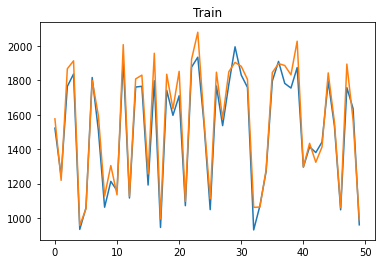

2/2 [==============================] - 0s 3ms/step


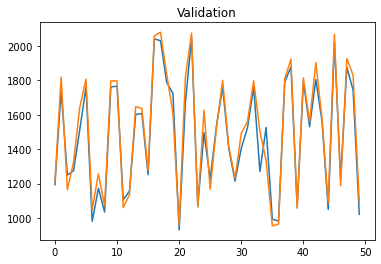

3/3 [==============================] - 0s 10ms/step


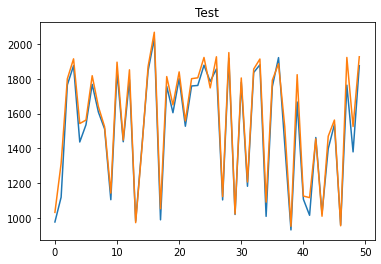

3/3 [==============================] - 0s 3ms/step


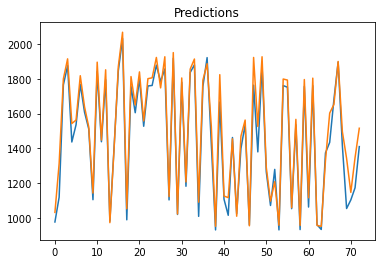

In [4]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 2478882.5000 - root_mean_squared_error: 1574.4468 

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 1s/step - loss: 2458745.7500 - root_mean_squared_error: 1568.0388 - val_loss: 2389972.5000 - val_root_mean_squared_error: 1545.9536
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2444070.2500 - root_mean_squared_error: 1563.3523

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2458661.7500 - root_mean_squared_error: 1568.0121 - val_loss: 2389890.2500 - val_root_mean_squared_error: 1545.9270
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2454457.5000 - root_mean_squared_error: 1566.6708

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2458578.7500 - root_mean_squared_error: 1567.9856 - val_loss: 2389807.7500 - val_root_mean_squared_error: 1545.9003
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2483114.0000 - root_mean_squared_error: 1575.7899

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2458495.7500 - root_mean_squared_error: 1567.9591 - val_loss: 2389725.7500 - val_root_mean_squared_error: 1545.8738
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2482511.2500 - root_mean_squared_error: 1575.5988

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2458413.0000 - root_mean_squared_error: 1567.9327 - val_loss: 2389644.5000 - val_root_mean_squared_error: 1545.8475
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 2476246.0000 - root_mean_squared_error: 1573.6093

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2458330.2500 - root_mean_squared_error: 1567.9064 - val_loss: 2389563.2500 - val_root_mean_squared_error: 1545.8212
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2457369.2500 - root_mean_squared_error: 1567.5999

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2458248.0000 - root_mean_squared_error: 1567.8801 - val_loss: 2389480.7500 - val_root_mean_squared_error: 1545.7946
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 2453803.0000 - root_mean_squared_error: 1566.4619

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2458165.0000 - root_mean_squared_error: 1567.8536 - val_loss: 2389399.0000 - val_root_mean_squared_error: 1545.7681
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2462253.5000 - root_mean_squared_error: 1569.1570

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2458081.2500 - root_mean_squared_error: 1567.8269 - val_loss: 2389315.7500 - val_root_mean_squared_error: 1545.7412
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 2491387.2500 - root_mean_squared_error: 1578.4128

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2457997.7500 - root_mean_squared_error: 1567.8003 - val_loss: 2389232.7500 - val_root_mean_squared_error: 1545.7144
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2457912.2500 - root_mean_squared_error: 1567.7731

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2457912.2500 - root_mean_squared_error: 1567.7731 - val_loss: 2389145.0000 - val_root_mean_squared_error: 1545.6859
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2446773.2500 - root_mean_squared_error: 1564.2166

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2457816.0000 - root_mean_squared_error: 1567.7423 - val_loss: 2389026.0000 - val_root_mean_squared_error: 1545.6475
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2497700.2500 - root_mean_squared_error: 1580.4114

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2457646.2500 - root_mean_squared_error: 1567.6882 - val_loss: 2388715.5000 - val_root_mean_squared_error: 1545.5470
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 2355671.5000 - root_mean_squared_error: 1534.8197

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2457263.5000 - root_mean_squared_error: 1567.5662 - val_loss: 2388408.7500 - val_root_mean_squared_error: 1545.4478
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 2440748.0000 - root_mean_squared_error: 1562.2893

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2457077.2500 - root_mean_squared_error: 1567.5067 - val_loss: 2388318.2500 - val_root_mean_squared_error: 1545.4185
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2456988.0000 - root_mean_squared_error: 1567.4783

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2456988.0000 - root_mean_squared_error: 1567.4783 - val_loss: 2388230.0000 - val_root_mean_squared_error: 1545.3899
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2475750.2500 - root_mean_squared_error: 1573.4517

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2456899.5000 - root_mean_squared_error: 1567.4500 - val_loss: 2388142.2500 - val_root_mean_squared_error: 1545.3616
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2452034.7500 - root_mean_squared_error: 1565.8975

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2456810.7500 - root_mean_squared_error: 1567.4216 - val_loss: 2388055.7500 - val_root_mean_squared_error: 1545.3335
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2569537.0000 - root_mean_squared_error: 1602.9775

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2456722.7500 - root_mean_squared_error: 1567.3937 - val_loss: 2387969.0000 - val_root_mean_squared_error: 1545.3054
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2456636.5000 - root_mean_squared_error: 1567.3661

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2456636.5000 - root_mean_squared_error: 1567.3661 - val_loss: 2387882.2500 - val_root_mean_squared_error: 1545.2773
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2399074.5000 - root_mean_squared_error: 1548.8947

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2456547.7500 - root_mean_squared_error: 1567.3378 - val_loss: 2387796.7500 - val_root_mean_squared_error: 1545.2498
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2452965.5000 - root_mean_squared_error: 1566.1946

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2456461.2500 - root_mean_squared_error: 1567.3102 - val_loss: 2387710.5000 - val_root_mean_squared_error: 1545.2218
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2477219.2500 - root_mean_squared_error: 1573.9185

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2456376.0000 - root_mean_squared_error: 1567.2830 - val_loss: 2387624.2500 - val_root_mean_squared_error: 1545.1940
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2456288.7500 - root_mean_squared_error: 1567.2551

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2456288.7500 - root_mean_squared_error: 1567.2551 - val_loss: 2387539.5000 - val_root_mean_squared_error: 1545.1665
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 2635662.2500 - root_mean_squared_error: 1623.4723

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2456203.7500 - root_mean_squared_error: 1567.2280 - val_loss: 2387455.0000 - val_root_mean_squared_error: 1545.1392
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2451008.7500 - root_mean_squared_error: 1565.5698

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2456117.5000 - root_mean_squared_error: 1567.2006 - val_loss: 2387370.5000 - val_root_mean_squared_error: 1545.1118
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2727207.0000 - root_mean_squared_error: 1651.4258

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2456032.5000 - root_mean_squared_error: 1567.1735 - val_loss: 2387286.0000 - val_root_mean_squared_error: 1545.0845
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2461859.2500 - root_mean_squared_error: 1569.0312

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2455947.7500 - root_mean_squared_error: 1567.1464 - val_loss: 2387202.2500 - val_root_mean_squared_error: 1545.0574
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 2468182.5000 - root_mean_squared_error: 1571.0450

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2455862.2500 - root_mean_squared_error: 1567.1191 - val_loss: 2387117.7500 - val_root_mean_squared_error: 1545.0300
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2439151.7500 - root_mean_squared_error: 1561.7784

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2455776.7500 - root_mean_squared_error: 1567.0918 - val_loss: 2387033.0000 - val_root_mean_squared_error: 1545.0026
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2656113.0000 - root_mean_squared_error: 1629.7585

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2455691.2500 - root_mean_squared_error: 1567.0646 - val_loss: 2386947.7500 - val_root_mean_squared_error: 1544.9750
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2455605.0000 - root_mean_squared_error: 1567.0370

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2455605.0000 - root_mean_squared_error: 1567.0370 - val_loss: 2386863.7500 - val_root_mean_squared_error: 1544.9478
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2384891.5000 - root_mean_squared_error: 1544.3094

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2455520.5000 - root_mean_squared_error: 1567.0100 - val_loss: 2386778.7500 - val_root_mean_squared_error: 1544.9203
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2309732.0000 - root_mean_squared_error: 1519.7803

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2455434.0000 - root_mean_squared_error: 1566.9824 - val_loss: 2386693.7500 - val_root_mean_squared_error: 1544.8928
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2455348.0000 - root_mean_squared_error: 1566.9550

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2455348.0000 - root_mean_squared_error: 1566.9550 - val_loss: 2386609.0000 - val_root_mean_squared_error: 1544.8654
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2444793.2500 - root_mean_squared_error: 1563.5835

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2455262.5000 - root_mean_squared_error: 1566.9277 - val_loss: 2386524.2500 - val_root_mean_squared_error: 1544.8379
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2457926.0000 - root_mean_squared_error: 1567.7775

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2455176.0000 - root_mean_squared_error: 1566.9001 - val_loss: 2386439.0000 - val_root_mean_squared_error: 1544.8103
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2445894.2500 - root_mean_squared_error: 1563.9355

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2455091.0000 - root_mean_squared_error: 1566.8730 - val_loss: 2386353.0000 - val_root_mean_squared_error: 1544.7825
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2184128.7500 - root_mean_squared_error: 1477.8798

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2455004.0000 - root_mean_squared_error: 1566.8452 - val_loss: 2386268.5000 - val_root_mean_squared_error: 1544.7551
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2624626.5000 - root_mean_squared_error: 1620.0699

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2454919.0000 - root_mean_squared_error: 1566.8181 - val_loss: 2386183.2500 - val_root_mean_squared_error: 1544.7275
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2422585.5000 - root_mean_squared_error: 1556.4657

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2454832.2500 - root_mean_squared_error: 1566.7904 - val_loss: 2386098.7500 - val_root_mean_squared_error: 1544.7001
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2436499.2500 - root_mean_squared_error: 1560.9290

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2454746.0000 - root_mean_squared_error: 1566.7629 - val_loss: 2386013.5000 - val_root_mean_squared_error: 1544.6726
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2387958.0000 - root_mean_squared_error: 1545.3019

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2454661.0000 - root_mean_squared_error: 1566.7357 - val_loss: 2385927.7500 - val_root_mean_squared_error: 1544.6449
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2454757.2500 - root_mean_squared_error: 1566.7665

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2454574.2500 - root_mean_squared_error: 1566.7081 - val_loss: 2385842.7500 - val_root_mean_squared_error: 1544.6173
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2345618.0000 - root_mean_squared_error: 1531.5410

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2454488.0000 - root_mean_squared_error: 1566.6805 - val_loss: 2385759.0000 - val_root_mean_squared_error: 1544.5902
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2478864.2500 - root_mean_squared_error: 1574.4409

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2454404.2500 - root_mean_squared_error: 1566.6538 - val_loss: 2385674.2500 - val_root_mean_squared_error: 1544.5627
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2454319.5000 - root_mean_squared_error: 1566.6268

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2454319.5000 - root_mean_squared_error: 1566.6268 - val_loss: 2385590.0000 - val_root_mean_squared_error: 1544.5355
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2454234.2500 - root_mean_squared_error: 1566.5996

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2454234.2500 - root_mean_squared_error: 1566.5996 - val_loss: 2385506.2500 - val_root_mean_squared_error: 1544.5084
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2201299.5000 - root_mean_squared_error: 1483.6777

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2454148.7500 - root_mean_squared_error: 1566.5723 - val_loss: 2385422.2500 - val_root_mean_squared_error: 1544.4812
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 2443836.2500 - root_mean_squared_error: 1563.2775

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 1s 4ms/step


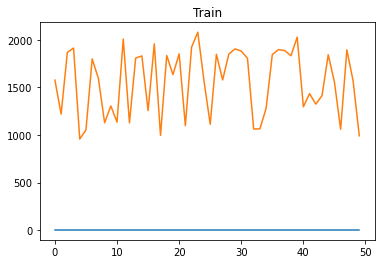

2/2 [==============================] - 1s 4ms/step


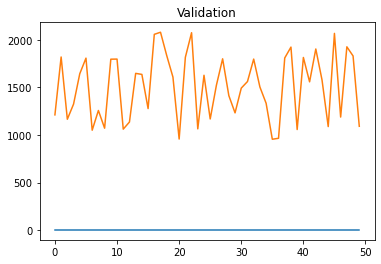

3/3 [==============================] - 0s 5ms/step


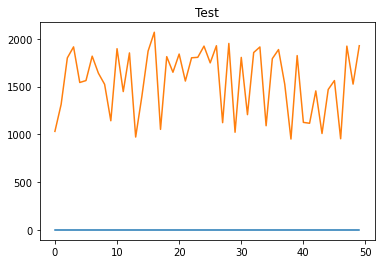

3/3 [==============================] - 0s 6ms/step


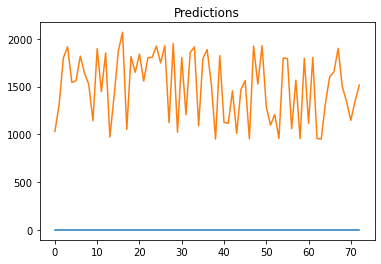

In [5]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2462632.5000 - root_mean_squared_error: 1569.2777 

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 2s/step - loss: 2462632.5000 - root_mean_squared_error: 1569.2777 - val_loss: 2393834.0000 - val_root_mean_squared_error: 1547.2020
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2718768.0000 - root_mean_squared_error: 1648.8687

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2462564.2500 - root_mean_squared_error: 1569.2560 - val_loss: 2393742.0000 - val_root_mean_squared_error: 1547.1722
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2425970.5000 - root_mean_squared_error: 1557.5527

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2462449.7500 - root_mean_squared_error: 1569.2195 - val_loss: 2393609.7500 - val_root_mean_squared_error: 1547.1295
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2451883.2500 - root_mean_squared_error: 1565.8490

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2462316.5000 - root_mean_squared_error: 1569.1770 - val_loss: 2393468.7500 - val_root_mean_squared_error: 1547.0840
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2458584.5000 - root_mean_squared_error: 1567.9874

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2462092.2500 - root_mean_squared_error: 1569.1056 - val_loss: 2392950.0000 - val_root_mean_squared_error: 1546.9163
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2440205.7500 - root_mean_squared_error: 1562.1158

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2461363.5000 - root_mean_squared_error: 1568.8733 - val_loss: 2392198.5000 - val_root_mean_squared_error: 1546.6733
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 2765170.7500 - root_mean_squared_error: 1662.8802

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2460724.2500 - root_mean_squared_error: 1568.6696 - val_loss: 2391645.5000 - val_root_mean_squared_error: 1546.4946
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2495343.0000 - root_mean_squared_error: 1579.6655

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2460165.0000 - root_mean_squared_error: 1568.4913 - val_loss: 2391000.2500 - val_root_mean_squared_error: 1546.2860
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2452743.7500 - root_mean_squared_error: 1566.1238

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2459454.2500 - root_mean_squared_error: 1568.2648 - val_loss: 2390431.0000 - val_root_mean_squared_error: 1546.1019
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 2497752.7500 - root_mean_squared_error: 1580.4280

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2459075.2500 - root_mean_squared_error: 1568.1439 - val_loss: 2390256.7500 - val_root_mean_squared_error: 1546.0455
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2464763.5000 - root_mean_squared_error: 1569.9565

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2458941.2500 - root_mean_squared_error: 1568.1012 - val_loss: 2390155.5000 - val_root_mean_squared_error: 1546.0128
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2458841.0000 - root_mean_squared_error: 1568.0692

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2458841.0000 - root_mean_squared_error: 1568.0692 - val_loss: 2390046.0000 - val_root_mean_squared_error: 1545.9774
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2461480.0000 - root_mean_squared_error: 1568.9104

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2458687.5000 - root_mean_squared_error: 1568.0203 - val_loss: 2389745.5000 - val_root_mean_squared_error: 1545.8801
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2458220.0000 - root_mean_squared_error: 1567.8712

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2458220.0000 - root_mean_squared_error: 1567.8712 - val_loss: 2389185.7500 - val_root_mean_squared_error: 1545.6991
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2156783.2500 - root_mean_squared_error: 1468.5991

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2457816.0000 - root_mean_squared_error: 1567.7423 - val_loss: 2389013.2500 - val_root_mean_squared_error: 1545.6433
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2435444.5000 - root_mean_squared_error: 1560.5911

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2457686.5000 - root_mean_squared_error: 1567.7010 - val_loss: 2388915.7500 - val_root_mean_squared_error: 1545.6117
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2480785.2500 - root_mean_squared_error: 1575.0509

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2457592.5000 - root_mean_squared_error: 1567.6710 - val_loss: 2388826.2500 - val_root_mean_squared_error: 1545.5828
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 2305378.0000 - root_mean_squared_error: 1518.3472

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2457503.5000 - root_mean_squared_error: 1567.6427 - val_loss: 2388741.0000 - val_root_mean_squared_error: 1545.5552
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2081099.3750 - root_mean_squared_error: 1442.6016

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2457418.0000 - root_mean_squared_error: 1567.6154 - val_loss: 2388657.7500 - val_root_mean_squared_error: 1545.5282
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2285169.5000 - root_mean_squared_error: 1511.6777

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2457334.0000 - root_mean_squared_error: 1567.5886 - val_loss: 2388574.2500 - val_root_mean_squared_error: 1545.5013
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2463104.0000 - root_mean_squared_error: 1569.4280

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2457250.2500 - root_mean_squared_error: 1567.5619 - val_loss: 2388491.7500 - val_root_mean_squared_error: 1545.4746
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2457167.5000 - root_mean_squared_error: 1567.5355

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2457167.5000 - root_mean_squared_error: 1567.5355 - val_loss: 2388409.7500 - val_root_mean_squared_error: 1545.4481
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2229999.0000 - root_mean_squared_error: 1493.3181

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2457083.7500 - root_mean_squared_error: 1567.5088 - val_loss: 2388326.2500 - val_root_mean_squared_error: 1545.4210
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2116518.0000 - root_mean_squared_error: 1454.8258

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2456996.2500 - root_mean_squared_error: 1567.4808 - val_loss: 2388227.5000 - val_root_mean_squared_error: 1545.3890
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2456867.0000 - root_mean_squared_error: 1567.4396

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2456867.0000 - root_mean_squared_error: 1567.4396 - val_loss: 2388049.0000 - val_root_mean_squared_error: 1545.3313
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2534289.5000 - root_mean_squared_error: 1591.9452

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2456691.2500 - root_mean_squared_error: 1567.3835 - val_loss: 2387854.2500 - val_root_mean_squared_error: 1545.2683
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2456485.2500 - root_mean_squared_error: 1567.3179

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2456485.2500 - root_mean_squared_error: 1567.3179 - val_loss: 2387709.2500 - val_root_mean_squared_error: 1545.2214
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2440655.2500 - root_mean_squared_error: 1562.2596

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2456368.5000 - root_mean_squared_error: 1567.2806 - val_loss: 2387607.2500 - val_root_mean_squared_error: 1545.1885
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2472584.0000 - root_mean_squared_error: 1572.4452

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2456266.0000 - root_mean_squared_error: 1567.2479 - val_loss: 2387505.0000 - val_root_mean_squared_error: 1545.1553
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2591608.7500 - root_mean_squared_error: 1609.8474

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2456163.7500 - root_mean_squared_error: 1567.2153 - val_loss: 2387405.5000 - val_root_mean_squared_error: 1545.1232
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2700479.0000 - root_mean_squared_error: 1643.3135

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2456063.0000 - root_mean_squared_error: 1567.1831 - val_loss: 2387306.7500 - val_root_mean_squared_error: 1545.0911
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 2255531.2500 - root_mean_squared_error: 1501.8427

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2455962.5000 - root_mean_squared_error: 1567.1511 - val_loss: 2387205.5000 - val_root_mean_squared_error: 1545.0585
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2455852.5000 - root_mean_squared_error: 1567.1160

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2455852.5000 - root_mean_squared_error: 1567.1160 - val_loss: 2387061.5000 - val_root_mean_squared_error: 1545.0118
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2455628.0000 - root_mean_squared_error: 1567.0443

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2455628.0000 - root_mean_squared_error: 1567.0443 - val_loss: 2386754.2500 - val_root_mean_squared_error: 1544.9124
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 2370190.5000 - root_mean_squared_error: 1539.5424

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2455403.0000 - root_mean_squared_error: 1566.9725 - val_loss: 2386660.5000 - val_root_mean_squared_error: 1544.8821
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2473039.2500 - root_mean_squared_error: 1572.5900

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2455316.0000 - root_mean_squared_error: 1566.9448 - val_loss: 2386576.7500 - val_root_mean_squared_error: 1544.8549
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2455231.5000 - root_mean_squared_error: 1566.9178

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2455231.5000 - root_mean_squared_error: 1566.9178 - val_loss: 2386493.2500 - val_root_mean_squared_error: 1544.8279
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 2408652.5000 - root_mean_squared_error: 1551.9834

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2455147.0000 - root_mean_squared_error: 1566.8909 - val_loss: 2386410.2500 - val_root_mean_squared_error: 1544.8010
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2466570.5000 - root_mean_squared_error: 1570.5319

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2455063.2500 - root_mean_squared_error: 1566.8641 - val_loss: 2386326.5000 - val_root_mean_squared_error: 1544.7739
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2454974.0000 - root_mean_squared_error: 1566.8357

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2454974.0000 - root_mean_squared_error: 1566.8357 - val_loss: 2386214.0000 - val_root_mean_squared_error: 1544.7375
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2211999.0000 - root_mean_squared_error: 1487.2791

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2454807.0000 - root_mean_squared_error: 1566.7823 - val_loss: 2386009.0000 - val_root_mean_squared_error: 1544.6711
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 2483228.5000 - root_mean_squared_error: 1575.8263

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2454656.2500 - root_mean_squared_error: 1566.7343 - val_loss: 2385922.7500 - val_root_mean_squared_error: 1544.6432
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2446349.0000 - root_mean_squared_error: 1564.0809

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2454570.7500 - root_mean_squared_error: 1566.7070 - val_loss: 2385840.0000 - val_root_mean_squared_error: 1544.6165
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2496774.7500 - root_mean_squared_error: 1580.1185

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2454487.2500 - root_mean_squared_error: 1566.6803 - val_loss: 2385757.0000 - val_root_mean_squared_error: 1544.5896
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 2473128.2500 - root_mean_squared_error: 1572.6183

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2454404.0000 - root_mean_squared_error: 1566.6538 - val_loss: 2385674.2500 - val_root_mean_squared_error: 1544.5627
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2454320.0000 - root_mean_squared_error: 1566.6270

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2454320.0000 - root_mean_squared_error: 1566.6270 - val_loss: 2385591.7500 - val_root_mean_squared_error: 1544.5361
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 2501293.0000 - root_mean_squared_error: 1581.5476

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2454237.0000 - root_mean_squared_error: 1566.6005 - val_loss: 2385509.5000 - val_root_mean_squared_error: 1544.5095
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2454154.0000 - root_mean_squared_error: 1566.5740

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2454154.0000 - root_mean_squared_error: 1566.5740 - val_loss: 2385427.5000 - val_root_mean_squared_error: 1544.4828
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 2436781.2500 - root_mean_squared_error: 1561.0193

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2454070.5000 - root_mean_squared_error: 1566.5474 - val_loss: 2385345.5000 - val_root_mean_squared_error: 1544.4564
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2453987.2500 - root_mean_squared_error: 1566.5208

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 2s 6ms/step


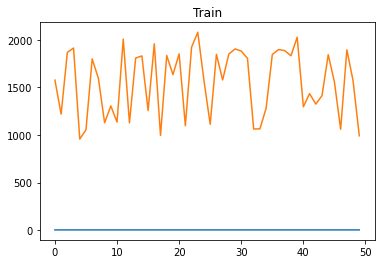

2/2 [==============================] - 1s 4ms/step


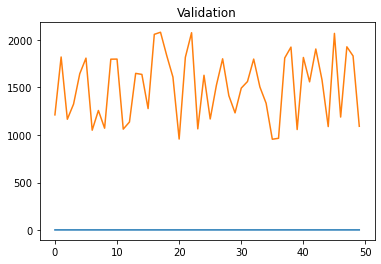

3/3 [==============================] - 0s 6ms/step


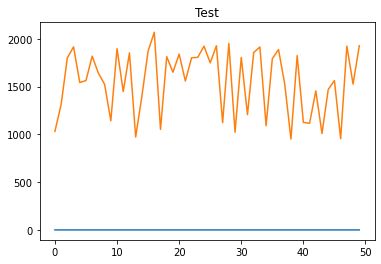

3/3 [==============================] - 0s 4ms/step


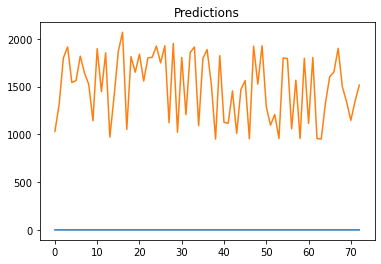

In [6]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
1/8 [==>...........................] - ETA: 20s - loss: 2648593.0000 - root_mean_squared_error: 1627.4498INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 638ms/step - loss: 2460751.2500 - root_mean_squared_error: 1568.6782 - val_loss: 2391912.7500 - val_root_mean_squared_error: 1546.5809
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2396196.7500 - root_mean_squared_error: 1547.9653INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 801ms/step - loss: 2460591.5000 - root_mean_squared_error: 1568.6273 - val_loss: 2391756.7500 - val_root_mean_squared_error: 1546.5305
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2460434.2500 - root_mean_squared_error: 1568.5771INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 818ms/step - loss: 2460434.2500 - root_mean_squared_error: 1568.5771 - val_loss: 2391599.2500 - val_root_mean_squared_error: 1546.4796
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2454405.2500 - root_mean_squared_error: 1566.6542INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 663ms/step - loss: 2460274.2500 - root_mean_squared_error: 1568.5261 - val_loss: 2391441.7500 - val_root_mean_squared_error: 1546.4287
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 2587110.5000 - root_mean_squared_error: 1608.4497INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 701ms/step - loss: 2460115.5000 - root_mean_squared_error: 1568.4756 - val_loss: 2391280.5000 - val_root_mean_squared_error: 1546.3766
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 2516123.7500 - root_mean_squared_error: 1586.2294INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 724ms/step - loss: 2459942.0000 - root_mean_squared_error: 1568.4202 - val_loss: 2391060.5000 - val_root_mean_squared_error: 1546.3054
Epoch 7/50
4/8 [==============>...............] - ETA: 0s - loss: 2523790.2500 - root_mean_squared_error: 1588.6442INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 691ms/step - loss: 2459557.7500 - root_mean_squared_error: 1568.2977 - val_loss: 2390309.5000 - val_root_mean_squared_error: 1546.0626
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 2285146.0000 - root_mean_squared_error: 1511.6699INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 635ms/step - loss: 2458875.7500 - root_mean_squared_error: 1568.0803 - val_loss: 2390008.7500 - val_root_mean_squared_error: 1545.9653
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 2193348.5000 - root_mean_squared_error: 1480.9957INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 779ms/step - loss: 2458666.5000 - root_mean_squared_error: 1568.0135 - val_loss: 2389847.7500 - val_root_mean_squared_error: 1545.9132
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2372256.7500 - root_mean_squared_error: 1540.2133INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 763ms/step - loss: 2458504.7500 - root_mean_squared_error: 1567.9619 - val_loss: 2389690.7500 - val_root_mean_squared_error: 1545.8624
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 2276033.5000 - root_mean_squared_error: 1508.6528INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 666ms/step - loss: 2458346.7500 - root_mean_squared_error: 1567.9116 - val_loss: 2389533.0000 - val_root_mean_squared_error: 1545.8114
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 2501530.5000 - root_mean_squared_error: 1581.6228INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 674ms/step - loss: 2458188.0000 - root_mean_squared_error: 1567.8610 - val_loss: 2389375.5000 - val_root_mean_squared_error: 1545.7605
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2620968.0000 - root_mean_squared_error: 1618.9404INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 647ms/step - loss: 2458029.7500 - root_mean_squared_error: 1567.8105 - val_loss: 2389218.5000 - val_root_mean_squared_error: 1545.7097
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 2143781.2500 - root_mean_squared_error: 1464.1658INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 711ms/step - loss: 2457871.0000 - root_mean_squared_error: 1567.7599 - val_loss: 2389062.5000 - val_root_mean_squared_error: 1545.6593
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2156207.5000 - root_mean_squared_error: 1468.4031INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 641ms/step - loss: 2457712.0000 - root_mean_squared_error: 1567.7091 - val_loss: 2388906.0000 - val_root_mean_squared_error: 1545.6086
Epoch 16/50
3/8 [==========>...................] - ETA: 0s - loss: 2444888.2500 - root_mean_squared_error: 1563.6139INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 619ms/step - loss: 2457554.0000 - root_mean_squared_error: 1567.6588 - val_loss: 2388748.2500 - val_root_mean_squared_error: 1545.5576
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2457395.0000 - root_mean_squared_error: 1567.6080INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 748ms/step - loss: 2457395.0000 - root_mean_squared_error: 1567.6080 - val_loss: 2388588.7500 - val_root_mean_squared_error: 1545.5060
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 2507483.0000 - root_mean_squared_error: 1583.5034INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 835ms/step - loss: 2457233.0000 - root_mean_squared_error: 1567.5564 - val_loss: 2388431.5000 - val_root_mean_squared_error: 1545.4551
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 2443918.0000 - root_mean_squared_error: 1563.3036INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 653ms/step - loss: 2457074.2500 - root_mean_squared_error: 1567.5057 - val_loss: 2388272.7500 - val_root_mean_squared_error: 1545.4038
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2825869.5000 - root_mean_squared_error: 1681.0322INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 791ms/step - loss: 2456915.0000 - root_mean_squared_error: 1567.4550 - val_loss: 2388114.2500 - val_root_mean_squared_error: 1545.3524
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2482636.7500 - root_mean_squared_error: 1575.6385INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 634ms/step - loss: 2456755.5000 - root_mean_squared_error: 1567.4041 - val_loss: 2387958.0000 - val_root_mean_squared_error: 1545.3019
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2479390.5000 - root_mean_squared_error: 1574.6080INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 674ms/step - loss: 2456599.0000 - root_mean_squared_error: 1567.3541 - val_loss: 2387802.5000 - val_root_mean_squared_error: 1545.2516
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2792231.0000 - root_mean_squared_error: 1670.9969INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 745ms/step - loss: 2456442.0000 - root_mean_squared_error: 1567.3041 - val_loss: 2387647.7500 - val_root_mean_squared_error: 1545.2015
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2464659.2500 - root_mean_squared_error: 1569.9233INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 702ms/step - loss: 2456284.7500 - root_mean_squared_error: 1567.2539 - val_loss: 2387491.7500 - val_root_mean_squared_error: 1545.1510
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2456127.2500 - root_mean_squared_error: 1567.2036INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 523ms/step - loss: 2456127.2500 - root_mean_squared_error: 1567.2036 - val_loss: 2387335.7500 - val_root_mean_squared_error: 1545.1006
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2231792.5000 - root_mean_squared_error: 1493.9185INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 676ms/step - loss: 2455968.5000 - root_mean_squared_error: 1567.1530 - val_loss: 2387179.7500 - val_root_mean_squared_error: 1545.0500
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2492631.2500 - root_mean_squared_error: 1578.8069INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 903ms/step - loss: 2455811.0000 - root_mean_squared_error: 1567.1028 - val_loss: 2387023.0000 - val_root_mean_squared_error: 1544.9994
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2480724.2500 - root_mean_squared_error: 1575.0315INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 692ms/step - loss: 2455653.2500 - root_mean_squared_error: 1567.0524 - val_loss: 2386866.5000 - val_root_mean_squared_error: 1544.9487
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2411121.0000 - root_mean_squared_error: 1552.7784INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 531ms/step - loss: 2455494.2500 - root_mean_squared_error: 1567.0017 - val_loss: 2386709.7500 - val_root_mean_squared_error: 1544.8979
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2271286.2500 - root_mean_squared_error: 1507.0787INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 605ms/step - loss: 2455336.0000 - root_mean_squared_error: 1566.9512 - val_loss: 2386552.7500 - val_root_mean_squared_error: 1544.8472
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2583478.5000 - root_mean_squared_error: 1607.3203INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 632ms/step - loss: 2455178.7500 - root_mean_squared_error: 1566.9010 - val_loss: 2386396.5000 - val_root_mean_squared_error: 1544.7966
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 2166712.0000 - root_mean_squared_error: 1471.9756INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 645ms/step - loss: 2455019.2500 - root_mean_squared_error: 1566.8501 - val_loss: 2386241.0000 - val_root_mean_squared_error: 1544.7462
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2353958.5000 - root_mean_squared_error: 1534.2616INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 708ms/step - loss: 2454861.7500 - root_mean_squared_error: 1566.7998 - val_loss: 2386084.2500 - val_root_mean_squared_error: 1544.6956
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 2632088.2500 - root_mean_squared_error: 1622.3712INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 756ms/step - loss: 2454703.7500 - root_mean_squared_error: 1566.7494 - val_loss: 2385927.0000 - val_root_mean_squared_error: 1544.6447
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 2602075.5000 - root_mean_squared_error: 1613.0950INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 647ms/step - loss: 2454545.5000 - root_mean_squared_error: 1566.6990 - val_loss: 2385768.2500 - val_root_mean_squared_error: 1544.5933
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2619273.5000 - root_mean_squared_error: 1618.4170INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 676ms/step - loss: 2454384.7500 - root_mean_squared_error: 1566.6476 - val_loss: 2385610.7500 - val_root_mean_squared_error: 1544.5422
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2347127.5000 - root_mean_squared_error: 1532.0338INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 656ms/step - loss: 2454225.5000 - root_mean_squared_error: 1566.5968 - val_loss: 2385454.2500 - val_root_mean_squared_error: 1544.4916
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 2402578.2500 - root_mean_squared_error: 1550.0253INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 534ms/step - loss: 2454067.7500 - root_mean_squared_error: 1566.5464 - val_loss: 2385297.5000 - val_root_mean_squared_error: 1544.4408
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2453910.0000 - root_mean_squared_error: 1566.4961INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 663ms/step - loss: 2453910.0000 - root_mean_squared_error: 1566.4961 - val_loss: 2385140.7500 - val_root_mean_squared_error: 1544.3900
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2416116.7500 - root_mean_squared_error: 1554.3864INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 592ms/step - loss: 2453752.0000 - root_mean_squared_error: 1566.4457 - val_loss: 2384984.7500 - val_root_mean_squared_error: 1544.3396
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2174624.0000 - root_mean_squared_error: 1474.6606INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 644ms/step - loss: 2453594.0000 - root_mean_squared_error: 1566.3953 - val_loss: 2384829.0000 - val_root_mean_squared_error: 1544.2892
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 2550632.5000 - root_mean_squared_error: 1597.0699INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 669ms/step - loss: 2453436.0000 - root_mean_squared_error: 1566.3448 - val_loss: 2384673.0000 - val_root_mean_squared_error: 1544.2386
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2123028.2500 - root_mean_squared_error: 1457.0615INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 693ms/step - loss: 2453278.7500 - root_mean_squared_error: 1566.2946 - val_loss: 2384517.2500 - val_root_mean_squared_error: 1544.1882
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2451980.5000 - root_mean_squared_error: 1565.8801INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 793ms/step - loss: 2453121.0000 - root_mean_squared_error: 1566.2443 - val_loss: 2384361.0000 - val_root_mean_squared_error: 1544.1376
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2494902.5000 - root_mean_squared_error: 1579.5260INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 719ms/step - loss: 2452964.2500 - root_mean_squared_error: 1566.1942 - val_loss: 2384205.5000 - val_root_mean_squared_error: 1544.0873
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 2562665.0000 - root_mean_squared_error: 1600.8326INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 662ms/step - loss: 2452807.0000 - root_mean_squared_error: 1566.1440 - val_loss: 2384048.7500 - val_root_mean_squared_error: 1544.0365
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2678929.5000 - root_mean_squared_error: 1636.7435INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 678ms/step - loss: 2452648.5000 - root_mean_squared_error: 1566.0934 - val_loss: 2383891.0000 - val_root_mean_squared_error: 1543.9855
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2506502.5000 - root_mean_squared_error: 1583.1937INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 720ms/step - loss: 2452488.0000 - root_mean_squared_error: 1566.0421 - val_loss: 2383734.5000 - val_root_mean_squared_error: 1543.9347
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2452330.0000 - root_mean_squared_error: 1565.9917INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 667ms/step - loss: 2452330.0000 - root_mean_squared_error: 1565.9917 - val_loss: 2383577.0000 - val_root_mean_squared_error: 1543.8838
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2306902.2500 - root_mean_squared_error: 1518.8490INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 3ms/step


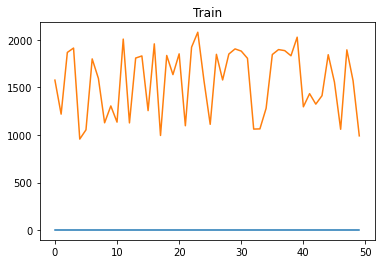

2/2 [==============================] - 0s 7ms/step


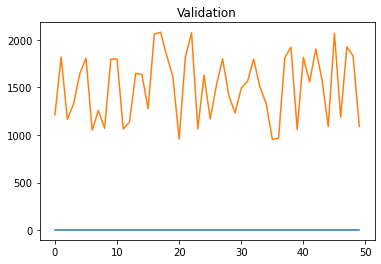

3/3 [==============================] - 0s 27ms/step


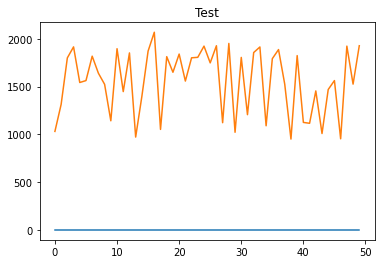

3/3 [==============================] - 0s 3ms/step


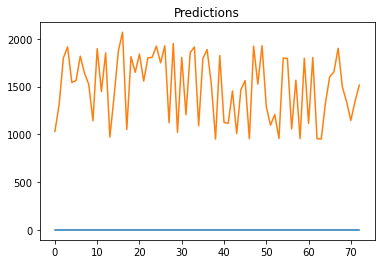

In [7]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
1/8 [==>...........................] - ETA: 10s - loss: 2455561.7500 - root_mean_squared_error: 1567.0232

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 452ms/step - loss: 2674173.0000 - root_mean_squared_error: 1635.2899 - val_loss: 2529099.5000 - val_root_mean_squared_error: 1590.3143
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2616011.7500 - root_mean_squared_error: 1617.4089

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 395ms/step - loss: 2555378.0000 - root_mean_squared_error: 1598.5549 - val_loss: 2409898.7500 - val_root_mean_squared_error: 1552.3849
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2437968.2500 - root_mean_squared_error: 1561.3994

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 273ms/step - loss: 2437968.2500 - root_mean_squared_error: 1561.3994 - val_loss: 2295233.0000 - val_root_mean_squared_error: 1515.0027
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2325778.5000 - root_mean_squared_error: 1525.0503

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 338ms/step - loss: 2325778.5000 - root_mean_squared_error: 1525.0503 - val_loss: 2184453.0000 - val_root_mean_squared_error: 1477.9895
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 2012802.3750 - root_mean_squared_error: 1418.7327

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 289ms/step - loss: 2217553.0000 - root_mean_squared_error: 1489.1450 - val_loss: 2077587.6250 - val_root_mean_squared_error: 1441.3839
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 2270748.0000 - root_mean_squared_error: 1506.9001

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 322ms/step - loss: 2113687.0000 - root_mean_squared_error: 1453.8524 - val_loss: 1974560.8750 - val_root_mean_squared_error: 1405.1907
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2012023.3750 - root_mean_squared_error: 1418.4581

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 312ms/step - loss: 2012794.7500 - root_mean_squared_error: 1418.7300 - val_loss: 1875985.8750 - val_root_mean_squared_error: 1369.6664
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 1916606.5000 - root_mean_squared_error: 1384.4155

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 298ms/step - loss: 1916606.5000 - root_mean_squared_error: 1384.4155 - val_loss: 1779865.6250 - val_root_mean_squared_error: 1334.1161
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 1822207.5000 - root_mean_squared_error: 1349.8916

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 297ms/step - loss: 1822207.5000 - root_mean_squared_error: 1349.8916 - val_loss: 1687274.6250 - val_root_mean_squared_error: 1298.9514
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 1809921.8750 - root_mean_squared_error: 1345.3334

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 432ms/step - loss: 1747818.0000 - root_mean_squared_error: 1322.0507 - val_loss: 1646175.5000 - val_root_mean_squared_error: 1283.0337
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 1727244.0000 - root_mean_squared_error: 1314.2466

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 329ms/step - loss: 1711461.6250 - root_mean_squared_error: 1308.2284 - val_loss: 1608891.1250 - val_root_mean_squared_error: 1268.4208
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 1674380.1250 - root_mean_squared_error: 1293.9784

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 313ms/step - loss: 1674380.1250 - root_mean_squared_error: 1293.9784 - val_loss: 1571960.2500 - val_root_mean_squared_error: 1253.7784
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 1578626.2500 - root_mean_squared_error: 1256.4340

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 342ms/step - loss: 1637893.0000 - root_mean_squared_error: 1279.8019 - val_loss: 1535038.3750 - val_root_mean_squared_error: 1238.9667
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 1614139.3750 - root_mean_squared_error: 1270.4878

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 316ms/step - loss: 1601424.7500 - root_mean_squared_error: 1265.4741 - val_loss: 1498355.1250 - val_root_mean_squared_error: 1224.0731
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 1555931.5000 - root_mean_squared_error: 1247.3699

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 384ms/step - loss: 1564882.5000 - root_mean_squared_error: 1250.9526 - val_loss: 1462235.7500 - val_root_mean_squared_error: 1209.2294
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 1685564.0000 - root_mean_squared_error: 1298.2927

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 354ms/step - loss: 1529482.2500 - root_mean_squared_error: 1236.7224 - val_loss: 1425649.2500 - val_root_mean_squared_error: 1194.0055
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 1608569.5000 - root_mean_squared_error: 1268.2939

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 244ms/step - loss: 1493159.5000 - root_mean_squared_error: 1221.9491 - val_loss: 1389577.6250 - val_root_mean_squared_error: 1178.8035
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 1243061.3750 - root_mean_squared_error: 1114.9266

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 319ms/step - loss: 1457292.2500 - root_mean_squared_error: 1207.1836 - val_loss: 1353918.8750 - val_root_mean_squared_error: 1163.5802
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 1303145.0000 - root_mean_squared_error: 1141.5537

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 313ms/step - loss: 1421898.6250 - root_mean_squared_error: 1192.4340 - val_loss: 1318311.1250 - val_root_mean_squared_error: 1148.1772
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 1245832.0000 - root_mean_squared_error: 1116.1685

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 342ms/step - loss: 1386852.3750 - root_mean_squared_error: 1177.6470 - val_loss: 1283478.6250 - val_root_mean_squared_error: 1132.9071
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 1599854.8750 - root_mean_squared_error: 1264.8536

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 302ms/step - loss: 1352613.1250 - root_mean_squared_error: 1163.0189 - val_loss: 1249237.0000 - val_root_mean_squared_error: 1117.6927
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 1325201.0000 - root_mean_squared_error: 1151.1737

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 296ms/step - loss: 1319148.2500 - root_mean_squared_error: 1148.5417 - val_loss: 1215103.2500 - val_root_mean_squared_error: 1102.3173
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 1080974.8750 - root_mean_squared_error: 1039.6995

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 252ms/step - loss: 1285036.2500 - root_mean_squared_error: 1133.5944 - val_loss: 1181652.3750 - val_root_mean_squared_error: 1087.0383
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 1077198.0000 - root_mean_squared_error: 1037.8815

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 270ms/step - loss: 1251860.1250 - root_mean_squared_error: 1118.8656 - val_loss: 1148149.7500 - val_root_mean_squared_error: 1071.5175
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 1277983.5000 - root_mean_squared_error: 1130.4794

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 267ms/step - loss: 1218763.3750 - root_mean_squared_error: 1103.9762 - val_loss: 1114434.3750 - val_root_mean_squared_error: 1055.6677
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 1131925.7500 - root_mean_squared_error: 1063.9200

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 315ms/step - loss: 1185230.2500 - root_mean_squared_error: 1088.6829 - val_loss: 1072579.3750 - val_root_mean_squared_error: 1035.6541
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 1165987.5000 - root_mean_squared_error: 1079.8090

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 307ms/step - loss: 1119147.0000 - root_mean_squared_error: 1057.8975 - val_loss: 966104.4375 - val_root_mean_squared_error: 982.9061
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 894403.1250 - root_mean_squared_error: 945.7289

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 309ms/step - loss: 1005499.9375 - root_mean_squared_error: 1002.7462 - val_loss: 849654.0625 - val_root_mean_squared_error: 921.7668
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 877442.5625 - root_mean_squared_error: 936.7191  

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 327ms/step - loss: 893082.8750 - root_mean_squared_error: 945.0306 - val_loss: 742181.5000 - val_root_mean_squared_error: 861.4996
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 990136.7500 - root_mean_squared_error: 995.0562

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 300ms/step - loss: 791287.6250 - root_mean_squared_error: 889.5435 - val_loss: 648143.1875 - val_root_mean_squared_error: 805.0734
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 703431.1875 - root_mean_squared_error: 838.7081

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 286ms/step - loss: 703431.1875 - root_mean_squared_error: 838.7081 - val_loss: 566293.5000 - val_root_mean_squared_error: 752.5248
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 624192.4375 - root_mean_squared_error: 790.0585

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 297ms/step - loss: 625442.6250 - root_mean_squared_error: 790.8493 - val_loss: 496746.6875 - val_root_mean_squared_error: 704.8026
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 542061.0000 - root_mean_squared_error: 736.2479

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 346ms/step - loss: 557569.6250 - root_mean_squared_error: 746.7059 - val_loss: 421061.5312 - val_root_mean_squared_error: 648.8925
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 437677.9688 - root_mean_squared_error: 661.5723

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 207ms/step - loss: 474652.7188 - root_mean_squared_error: 688.9504 - val_loss: 337508.6562 - val_root_mean_squared_error: 580.9550
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 506511.8750 - root_mean_squared_error: 711.6965

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 270ms/step - loss: 397348.1875 - root_mean_squared_error: 630.3556 - val_loss: 266126.4375 - val_root_mean_squared_error: 515.8745
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 329904.3125 - root_mean_squared_error: 574.3730

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 299ms/step - loss: 329904.3125 - root_mean_squared_error: 574.3730 - val_loss: 208198.3750 - val_root_mean_squared_error: 456.2876
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 317161.9062 - root_mean_squared_error: 563.1713

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 425ms/step - loss: 276922.1250 - root_mean_squared_error: 526.2339 - val_loss: 159984.0625 - val_root_mean_squared_error: 399.9801
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 222131.5938 - root_mean_squared_error: 471.3084

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 316ms/step - loss: 232550.5625 - root_mean_squared_error: 482.2350 - val_loss: 123558.7031 - val_root_mean_squared_error: 351.5092
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 182100.3125 - root_mean_squared_error: 426.7321

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 239ms/step - loss: 199527.7969 - root_mean_squared_error: 446.6853 - val_loss: 94782.9297 - val_root_mean_squared_error: 307.8684
Epoch 40/50
4/8 [==============>...............] - ETA: 0s - loss: 174451.2656 - root_mean_squared_error: 417.6736

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 244ms/step - loss: 172456.3906 - root_mean_squared_error: 415.2787 - val_loss: 72117.3281 - val_root_mean_squared_error: 268.5467
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 198334.9062 - root_mean_squared_error: 445.3481

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 243ms/step - loss: 151544.7344 - root_mean_squared_error: 389.2875 - val_loss: 54602.6953 - val_root_mean_squared_error: 233.6722
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 122801.6797 - root_mean_squared_error: 350.4307

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 246ms/step - loss: 134519.0156 - root_mean_squared_error: 366.7683 - val_loss: 40718.6367 - val_root_mean_squared_error: 201.7886
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 146271.5938 - root_mean_squared_error: 382.4547

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 208ms/step - loss: 122579.9766 - root_mean_squared_error: 350.1142 - val_loss: 30589.3828 - val_root_mean_squared_error: 174.8982
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 114622.8438 - root_mean_squared_error: 338.5600

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 312ms/step - loss: 113155.7344 - root_mean_squared_error: 336.3863 - val_loss: 23078.5078 - val_root_mean_squared_error: 151.9161
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 70808.2969 - root_mean_squared_error: 266.0983

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 319ms/step - loss: 106230.3984 - root_mean_squared_error: 325.9301 - val_loss: 17632.3359 - val_root_mean_squared_error: 132.7868
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 93418.8047 - root_mean_squared_error: 305.6449

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 262ms/step - loss: 101152.8125 - root_mean_squared_error: 318.0453 - val_loss: 13622.1914 - val_root_mean_squared_error: 116.7141
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 115216.9531 - root_mean_squared_error: 339.4362

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 224ms/step - loss: 97297.7578 - root_mean_squared_error: 311.9259 - val_loss: 10432.6377 - val_root_mean_squared_error: 102.1403
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 82425.5000 - root_mean_squared_error: 287.0984

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 272ms/step - loss: 94002.1484 - root_mean_squared_error: 306.5977 - val_loss: 8330.4844 - val_root_mean_squared_error: 91.2715
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 101618.6328 - root_mean_squared_error: 318.7768

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 315ms/step - loss: 92065.9688 - root_mean_squared_error: 303.4237 - val_loss: 6694.5088 - val_root_mean_squared_error: 81.8200
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 47677.7305 - root_mean_squared_error: 218.3523

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 0s 6ms/step


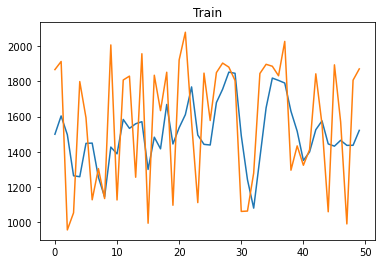

2/2 [==============================] - 0s 3ms/step


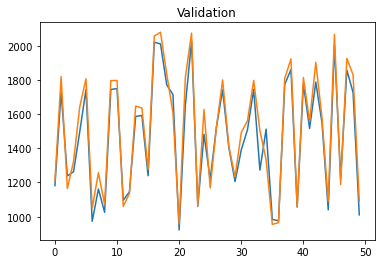

3/3 [==============================] - 0s 3ms/step


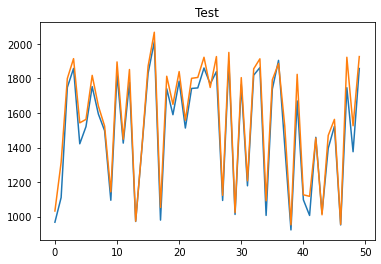

3/3 [==============================] - 0s 6ms/step


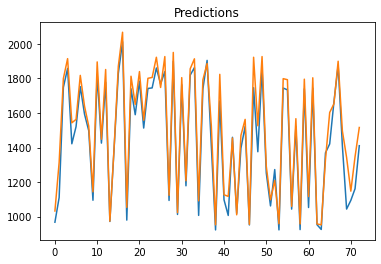

In [9]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2471531.5000 - root_mean_squared_error: 1572.1105 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 2s/step - loss: 2462678.2500 - root_mean_squared_error: 1569.2922 - val_loss: 2389583.5000 - val_root_mean_squared_error: 1545.8278
Epoch 2/50
4/8 [==============>...............] - ETA: 0s - loss: 2336797.7500 - root_mean_squared_error: 1528.6588

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2462130.7500 - root_mean_squared_error: 1569.1178 - val_loss: 2388626.0000 - val_root_mean_squared_error: 1545.5181
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2479425.2500 - root_mean_squared_error: 1574.6191

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2461215.5000 - root_mean_squared_error: 1568.8262 - val_loss: 2388036.5000 - val_root_mean_squared_error: 1545.3273
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2503410.5000 - root_mean_squared_error: 1582.2169

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2460639.0000 - root_mean_squared_error: 1568.6425 - val_loss: 2387137.0000 - val_root_mean_squared_error: 1545.0363
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 2446742.7500 - root_mean_squared_error: 1564.2068

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2459530.5000 - root_mean_squared_error: 1568.2891 - val_loss: 2386285.5000 - val_root_mean_squared_error: 1544.7606
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2493166.0000 - root_mean_squared_error: 1578.9762

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2459038.5000 - root_mean_squared_error: 1568.1322 - val_loss: 2386095.0000 - val_root_mean_squared_error: 1544.6990
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 2574890.5000 - root_mean_squared_error: 1604.6465

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2458867.7500 - root_mean_squared_error: 1568.0778 - val_loss: 2385954.7500 - val_root_mean_squared_error: 1544.6536
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2419762.0000 - root_mean_squared_error: 1555.5585

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2458751.5000 - root_mean_squared_error: 1568.0406 - val_loss: 2385865.5000 - val_root_mean_squared_error: 1544.6248
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2453944.2500 - root_mean_squared_error: 1566.5071

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2458664.5000 - root_mean_squared_error: 1568.0129 - val_loss: 2385778.7500 - val_root_mean_squared_error: 1544.5967
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 2418540.0000 - root_mean_squared_error: 1555.1655

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 1s/step - loss: 2458577.2500 - root_mean_squared_error: 1567.9851 - val_loss: 2385691.0000 - val_root_mean_squared_error: 1544.5682
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2457241.5000 - root_mean_squared_error: 1567.5591

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2458485.7500 - root_mean_squared_error: 1567.9559 - val_loss: 2385584.2500 - val_root_mean_squared_error: 1544.5337
Epoch 12/50
3/8 [==========>...................] - ETA: 0s - loss: 2409455.2500 - root_mean_squared_error: 1552.2421

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 8s 1s/step - loss: 2458346.5000 - root_mean_squared_error: 1567.9115 - val_loss: 2385358.2500 - val_root_mean_squared_error: 1544.4604
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2458047.2500 - root_mean_squared_error: 1567.8160

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2458047.2500 - root_mean_squared_error: 1567.8160 - val_loss: 2385084.2500 - val_root_mean_squared_error: 1544.3718
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2462360.5000 - root_mean_squared_error: 1569.1910

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2457871.0000 - root_mean_squared_error: 1567.7599 - val_loss: 2384991.0000 - val_root_mean_squared_error: 1544.3416
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2472287.7500 - root_mean_squared_error: 1572.3511

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2457780.0000 - root_mean_squared_error: 1567.7308 - val_loss: 2384903.0000 - val_root_mean_squared_error: 1544.3131
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2448780.0000 - root_mean_squared_error: 1564.8578

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2457692.0000 - root_mean_squared_error: 1567.7028 - val_loss: 2384815.5000 - val_root_mean_squared_error: 1544.2848
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2457603.2500 - root_mean_squared_error: 1567.6747

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2457603.2500 - root_mean_squared_error: 1567.6747 - val_loss: 2384727.7500 - val_root_mean_squared_error: 1544.2563
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2453238.7500 - root_mean_squared_error: 1566.2819

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2457514.2500 - root_mean_squared_error: 1567.6461 - val_loss: 2384640.0000 - val_root_mean_squared_error: 1544.2279
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2442153.5000 - root_mean_squared_error: 1562.7391

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2457425.5000 - root_mean_squared_error: 1567.6178 - val_loss: 2384552.0000 - val_root_mean_squared_error: 1544.1995
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2355454.0000 - root_mean_squared_error: 1534.7488

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2457337.2500 - root_mean_squared_error: 1567.5896 - val_loss: 2384464.5000 - val_root_mean_squared_error: 1544.1711
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2457606.2500 - root_mean_squared_error: 1567.6754

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2457248.7500 - root_mean_squared_error: 1567.5614 - val_loss: 2384377.0000 - val_root_mean_squared_error: 1544.1428
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2356849.7500 - root_mean_squared_error: 1535.2035

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2457160.0000 - root_mean_squared_error: 1567.5331 - val_loss: 2384290.7500 - val_root_mean_squared_error: 1544.1149
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2466871.7500 - root_mean_squared_error: 1570.6278

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2457073.0000 - root_mean_squared_error: 1567.5054 - val_loss: 2384203.5000 - val_root_mean_squared_error: 1544.0867
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2456985.5000 - root_mean_squared_error: 1567.4774

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2456985.5000 - root_mean_squared_error: 1567.4774 - val_loss: 2384117.0000 - val_root_mean_squared_error: 1544.0586
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 2369063.0000 - root_mean_squared_error: 1539.1760

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2456897.7500 - root_mean_squared_error: 1567.4495 - val_loss: 2384031.5000 - val_root_mean_squared_error: 1544.0309
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2521112.2500 - root_mean_squared_error: 1587.8010

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2456812.0000 - root_mean_squared_error: 1567.4219 - val_loss: 2383946.0000 - val_root_mean_squared_error: 1544.0032
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2605054.7500 - root_mean_squared_error: 1614.0182

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2456725.0000 - root_mean_squared_error: 1567.3943 - val_loss: 2383859.7500 - val_root_mean_squared_error: 1543.9753
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2456637.7500 - root_mean_squared_error: 1567.3665

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2456637.7500 - root_mean_squared_error: 1567.3665 - val_loss: 2383774.2500 - val_root_mean_squared_error: 1543.9476
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2469746.2500 - root_mean_squared_error: 1571.5426

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2456551.5000 - root_mean_squared_error: 1567.3390 - val_loss: 2383688.2500 - val_root_mean_squared_error: 1543.9198
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 2475122.7500 - root_mean_squared_error: 1573.2523

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2456464.5000 - root_mean_squared_error: 1567.3113 - val_loss: 2383602.7500 - val_root_mean_squared_error: 1543.8921
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2456633.7500 - root_mean_squared_error: 1567.3652

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2456379.0000 - root_mean_squared_error: 1567.2839 - val_loss: 2383516.7500 - val_root_mean_squared_error: 1543.8643
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2462604.5000 - root_mean_squared_error: 1569.2688

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2456292.0000 - root_mean_squared_error: 1567.2562 - val_loss: 2383431.7500 - val_root_mean_squared_error: 1543.8367
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2468784.0000 - root_mean_squared_error: 1571.2365

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2456206.0000 - root_mean_squared_error: 1567.2288 - val_loss: 2383346.7500 - val_root_mean_squared_error: 1543.8092
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2438688.0000 - root_mean_squared_error: 1561.6299

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2456120.2500 - root_mean_squared_error: 1567.2014 - val_loss: 2383262.0000 - val_root_mean_squared_error: 1543.7817
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2456034.7500 - root_mean_squared_error: 1567.1741

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2456034.7500 - root_mean_squared_error: 1567.1741 - val_loss: 2383177.5000 - val_root_mean_squared_error: 1543.7544
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2455949.2500 - root_mean_squared_error: 1567.1469

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2455949.2500 - root_mean_squared_error: 1567.1469 - val_loss: 2383093.0000 - val_root_mean_squared_error: 1543.7269
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2473658.2500 - root_mean_squared_error: 1572.7867

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2455863.5000 - root_mean_squared_error: 1567.1195 - val_loss: 2383008.5000 - val_root_mean_squared_error: 1543.6996
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2455779.2500 - root_mean_squared_error: 1567.0927

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2455779.2500 - root_mean_squared_error: 1567.0927 - val_loss: 2382924.5000 - val_root_mean_squared_error: 1543.6724
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2459460.0000 - root_mean_squared_error: 1568.2666

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2455693.7500 - root_mean_squared_error: 1567.0653 - val_loss: 2382840.0000 - val_root_mean_squared_error: 1543.6450
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2455608.5000 - root_mean_squared_error: 1567.0381

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2455608.5000 - root_mean_squared_error: 1567.0381 - val_loss: 2382755.2500 - val_root_mean_squared_error: 1543.6176
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2455522.5000 - root_mean_squared_error: 1567.0107

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2455522.5000 - root_mean_squared_error: 1567.0107 - val_loss: 2382671.0000 - val_root_mean_squared_error: 1543.5903
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2455436.7500 - root_mean_squared_error: 1566.9833

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2455436.7500 - root_mean_squared_error: 1566.9833 - val_loss: 2382586.0000 - val_root_mean_squared_error: 1543.5627
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2455350.7500 - root_mean_squared_error: 1566.9559

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2455350.7500 - root_mean_squared_error: 1566.9559 - val_loss: 2382500.2500 - val_root_mean_squared_error: 1543.5350
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2452908.5000 - root_mean_squared_error: 1566.1764

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2455265.0000 - root_mean_squared_error: 1566.9285 - val_loss: 2382415.0000 - val_root_mean_squared_error: 1543.5073
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2275161.7500 - root_mean_squared_error: 1508.3639

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2455178.0000 - root_mean_squared_error: 1566.9008 - val_loss: 2382330.0000 - val_root_mean_squared_error: 1543.4799
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2455092.5000 - root_mean_squared_error: 1566.8735

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2455092.5000 - root_mean_squared_error: 1566.8735 - val_loss: 2382245.0000 - val_root_mean_squared_error: 1543.4523
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2279803.5000 - root_mean_squared_error: 1509.9019

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2455006.5000 - root_mean_squared_error: 1566.8461 - val_loss: 2382160.7500 - val_root_mean_squared_error: 1543.4250
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2455772.2500 - root_mean_squared_error: 1567.0903

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2454920.7500 - root_mean_squared_error: 1566.8187 - val_loss: 2382076.2500 - val_root_mean_squared_error: 1543.3976
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2548105.0000 - root_mean_squared_error: 1596.2784

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2454836.0000 - root_mean_squared_error: 1566.7916 - val_loss: 2381991.2500 - val_root_mean_squared_error: 1543.3701
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2263569.0000 - root_mean_squared_error: 1504.5162

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 4ms/step


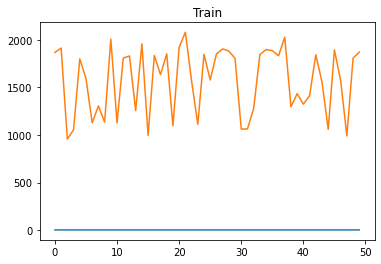

2/2 [==============================] - 1s 7ms/step


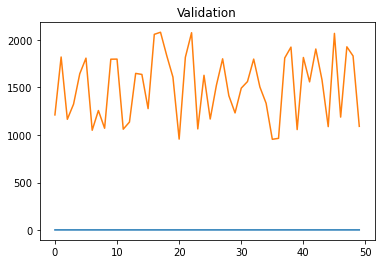

3/3 [==============================] - 0s 4ms/step


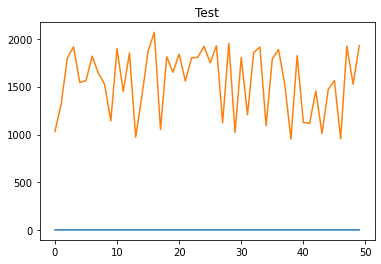

3/3 [==============================] - 0s 6ms/step


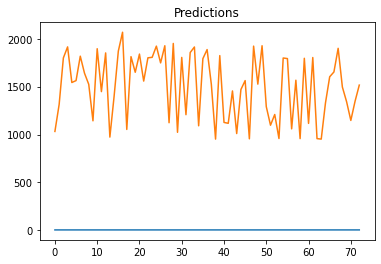

In [10]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2471558.5000 - root_mean_squared_error: 1572.1191 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 18s 2s/step - loss: 2465211.0000 - root_mean_squared_error: 1570.0990 - val_loss: 2392261.0000 - val_root_mean_squared_error: 1546.6936
Epoch 2/50
4/8 [==============>...............] - ETA: 0s - loss: 2551216.0000 - root_mean_squared_error: 1597.2527

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2465141.5000 - root_mean_squared_error: 1570.0769 - val_loss: 2392199.2500 - val_root_mean_squared_error: 1546.6736
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2494492.5000 - root_mean_squared_error: 1579.3962

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2465085.2500 - root_mean_squared_error: 1570.0590 - val_loss: 2392151.0000 - val_root_mean_squared_error: 1546.6580
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2465033.2500 - root_mean_squared_error: 1570.0425

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2465033.2500 - root_mean_squared_error: 1570.0425 - val_loss: 2392090.5000 - val_root_mean_squared_error: 1546.6384
Epoch 5/50
3/8 [==========>...................] - ETA: 0s - loss: 2484336.2500 - root_mean_squared_error: 1576.1777

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2464970.5000 - root_mean_squared_error: 1570.0225 - val_loss: 2392032.0000 - val_root_mean_squared_error: 1546.6195
Epoch 6/50
4/8 [==============>...............] - ETA: 0s - loss: 2397898.0000 - root_mean_squared_error: 1548.5148

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2464911.7500 - root_mean_squared_error: 1570.0038 - val_loss: 2391963.0000 - val_root_mean_squared_error: 1546.5973
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2443091.2500 - root_mean_squared_error: 1563.0391

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2464810.5000 - root_mean_squared_error: 1569.9714 - val_loss: 2391795.7500 - val_root_mean_squared_error: 1546.5432
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 2425013.0000 - root_mean_squared_error: 1557.2454

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2464628.5000 - root_mean_squared_error: 1569.9136 - val_loss: 2391637.5000 - val_root_mean_squared_error: 1546.4919
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 2426598.5000 - root_mean_squared_error: 1557.7543

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2464496.2500 - root_mean_squared_error: 1569.8715 - val_loss: 2391545.5000 - val_root_mean_squared_error: 1546.4623
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2484348.2500 - root_mean_squared_error: 1576.1815

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2464408.0000 - root_mean_squared_error: 1569.8433 - val_loss: 2391462.5000 - val_root_mean_squared_error: 1546.4354
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2481813.7500 - root_mean_squared_error: 1575.3773

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2464327.7500 - root_mean_squared_error: 1569.8177 - val_loss: 2391381.0000 - val_root_mean_squared_error: 1546.4091
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2464243.7500 - root_mean_squared_error: 1569.7910

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2464243.7500 - root_mean_squared_error: 1569.7910 - val_loss: 2391330.7500 - val_root_mean_squared_error: 1546.3928
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 2479835.2500 - root_mean_squared_error: 1574.7493

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2464209.2500 - root_mean_squared_error: 1569.7800 - val_loss: 2391281.7500 - val_root_mean_squared_error: 1546.3770
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2470192.0000 - root_mean_squared_error: 1571.6844

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2464162.0000 - root_mean_squared_error: 1569.7649 - val_loss: 2391248.0000 - val_root_mean_squared_error: 1546.3661
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2464125.0000 - root_mean_squared_error: 1569.7532

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2464125.0000 - root_mean_squared_error: 1569.7532 - val_loss: 2391210.5000 - val_root_mean_squared_error: 1546.3539
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2464086.7500 - root_mean_squared_error: 1569.7410

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2464086.7500 - root_mean_squared_error: 1569.7410 - val_loss: 2391165.2500 - val_root_mean_squared_error: 1546.3394
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 2420726.2500 - root_mean_squared_error: 1555.8683

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2464035.5000 - root_mean_squared_error: 1569.7246 - val_loss: 2391110.5000 - val_root_mean_squared_error: 1546.3217
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 2516172.5000 - root_mean_squared_error: 1586.2448

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2463977.7500 - root_mean_squared_error: 1569.7063 - val_loss: 2391038.0000 - val_root_mean_squared_error: 1546.2982
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2457640.5000 - root_mean_squared_error: 1567.6864

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2463897.7500 - root_mean_squared_error: 1569.6808 - val_loss: 2390975.0000 - val_root_mean_squared_error: 1546.2778
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 2458273.5000 - root_mean_squared_error: 1567.8882

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2463852.7500 - root_mean_squared_error: 1569.6665 - val_loss: 2390943.5000 - val_root_mean_squared_error: 1546.2676
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2463822.0000 - root_mean_squared_error: 1569.6566

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2463822.0000 - root_mean_squared_error: 1569.6566 - val_loss: 2390913.7500 - val_root_mean_squared_error: 1546.2579
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2328563.5000 - root_mean_squared_error: 1525.9631

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2463792.2500 - root_mean_squared_error: 1569.6472 - val_loss: 2390885.5000 - val_root_mean_squared_error: 1546.2489
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2473541.7500 - root_mean_squared_error: 1572.7498

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2463763.5000 - root_mean_squared_error: 1569.6381 - val_loss: 2390857.0000 - val_root_mean_squared_error: 1546.2396
Epoch 24/50
5/8 [=================>............] - ETA: 0s - loss: 2479379.2500 - root_mean_squared_error: 1574.6045

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2463735.2500 - root_mean_squared_error: 1569.6290 - val_loss: 2390828.7500 - val_root_mean_squared_error: 1546.2305
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2463706.5000 - root_mean_squared_error: 1569.6199

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2463706.5000 - root_mean_squared_error: 1569.6199 - val_loss: 2390800.5000 - val_root_mean_squared_error: 1546.2213
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 2321114.0000 - root_mean_squared_error: 1523.5203

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2463677.7500 - root_mean_squared_error: 1569.6107 - val_loss: 2390771.7500 - val_root_mean_squared_error: 1546.2120
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2481151.5000 - root_mean_squared_error: 1575.1671

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2463649.2500 - root_mean_squared_error: 1569.6016 - val_loss: 2390743.2500 - val_root_mean_squared_error: 1546.2029
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2460282.2500 - root_mean_squared_error: 1568.5287

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2463620.2500 - root_mean_squared_error: 1569.5924 - val_loss: 2390714.5000 - val_root_mean_squared_error: 1546.1936
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2424615.5000 - root_mean_squared_error: 1557.1177

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2463590.7500 - root_mean_squared_error: 1569.5830 - val_loss: 2390685.7500 - val_root_mean_squared_error: 1546.1842
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2467862.7500 - root_mean_squared_error: 1570.9432

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2463562.0000 - root_mean_squared_error: 1569.5739 - val_loss: 2390656.5000 - val_root_mean_squared_error: 1546.1748
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2463532.5000 - root_mean_squared_error: 1569.5645

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2463532.5000 - root_mean_squared_error: 1569.5645 - val_loss: 2390627.2500 - val_root_mean_squared_error: 1546.1653
Epoch 32/50
2/8 [======>.......................] - ETA: 0s - loss: 2604723.7500 - root_mean_squared_error: 1613.9156

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2463502.7500 - root_mean_squared_error: 1569.5549 - val_loss: 2390597.7500 - val_root_mean_squared_error: 1546.1558
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2463472.7500 - root_mean_squared_error: 1569.5454

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2463472.7500 - root_mean_squared_error: 1569.5454 - val_loss: 2390567.7500 - val_root_mean_squared_error: 1546.1461
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2454109.2500 - root_mean_squared_error: 1566.5597

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2463442.5000 - root_mean_squared_error: 1569.5358 - val_loss: 2390538.0000 - val_root_mean_squared_error: 1546.1365
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2468086.0000 - root_mean_squared_error: 1571.0143

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2463412.0000 - root_mean_squared_error: 1569.5260 - val_loss: 2390507.2500 - val_root_mean_squared_error: 1546.1266
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2463381.0000 - root_mean_squared_error: 1569.5161

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2463381.0000 - root_mean_squared_error: 1569.5161 - val_loss: 2390476.7500 - val_root_mean_squared_error: 1546.1167
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2538720.7500 - root_mean_squared_error: 1593.3363

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2463350.2500 - root_mean_squared_error: 1569.5063 - val_loss: 2390445.5000 - val_root_mean_squared_error: 1546.1066
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 2098368.7500 - root_mean_squared_error: 1448.5747

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2463318.7500 - root_mean_squared_error: 1569.4963 - val_loss: 2390414.5000 - val_root_mean_squared_error: 1546.0966
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2459888.2500 - root_mean_squared_error: 1568.4031

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2463286.7500 - root_mean_squared_error: 1569.4861 - val_loss: 2390383.0000 - val_root_mean_squared_error: 1546.0863
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2438837.7500 - root_mean_squared_error: 1561.6779

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2463254.2500 - root_mean_squared_error: 1569.4758 - val_loss: 2390349.7500 - val_root_mean_squared_error: 1546.0756
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2461436.2500 - root_mean_squared_error: 1568.8965

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2463217.2500 - root_mean_squared_error: 1569.4640 - val_loss: 2390290.2500 - val_root_mean_squared_error: 1546.0563
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2463115.7500 - root_mean_squared_error: 1569.4316

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2463115.7500 - root_mean_squared_error: 1569.4316 - val_loss: 2390161.0000 - val_root_mean_squared_error: 1546.0145
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2463024.2500 - root_mean_squared_error: 1569.4025

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2463024.2500 - root_mean_squared_error: 1569.4025 - val_loss: 2390117.2500 - val_root_mean_squared_error: 1546.0004
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2467442.2500 - root_mean_squared_error: 1570.8094

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2462983.2500 - root_mean_squared_error: 1569.3894 - val_loss: 2390079.5000 - val_root_mean_squared_error: 1545.9882
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 2421774.0000 - root_mean_squared_error: 1556.2050

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2462945.5000 - root_mean_squared_error: 1569.3774 - val_loss: 2390041.5000 - val_root_mean_squared_error: 1545.9760
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2462907.5000 - root_mean_squared_error: 1569.3654

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2462907.5000 - root_mean_squared_error: 1569.3654 - val_loss: 2390003.2500 - val_root_mean_squared_error: 1545.9635
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2464868.7500 - root_mean_squared_error: 1569.9900

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2462868.5000 - root_mean_squared_error: 1569.3529 - val_loss: 2389964.7500 - val_root_mean_squared_error: 1545.9510
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2292368.5000 - root_mean_squared_error: 1514.0570

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2462829.5000 - root_mean_squared_error: 1569.3405 - val_loss: 2389926.2500 - val_root_mean_squared_error: 1545.9386
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 2505552.2500 - root_mean_squared_error: 1582.8937

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2462790.7500 - root_mean_squared_error: 1569.3281 - val_loss: 2389887.5000 - val_root_mean_squared_error: 1545.9261
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2391090.2500 - root_mean_squared_error: 1546.3151

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 2s 6ms/step


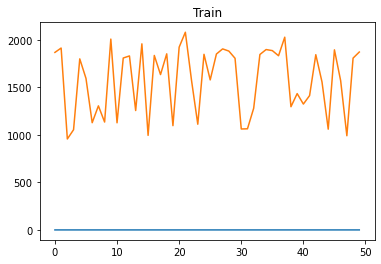

2/2 [==============================] - 1s 25ms/step


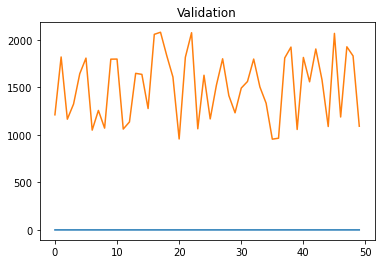

3/3 [==============================] - 0s 5ms/step


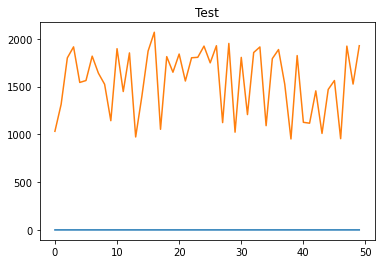

3/3 [==============================] - 0s 22ms/step


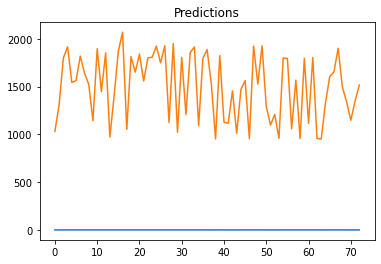

In [11]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2463151.2500 - root_mean_squared_error: 1569.4430 INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 858ms/step - loss: 2463151.2500 - root_mean_squared_error: 1569.4430 - val_loss: 2390170.7500 - val_root_mean_squared_error: 1546.0176
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2247873.2500 - root_mean_squared_error: 1499.2909INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 575ms/step - loss: 2462992.7500 - root_mean_squared_error: 1569.3925 - val_loss: 2390013.5000 - val_root_mean_squared_error: 1545.9668
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2462834.0000 - root_mean_squared_error: 1569.3419INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 815ms/step - loss: 2462834.0000 - root_mean_squared_error: 1569.3419 - val_loss: 2389857.0000 - val_root_mean_squared_error: 1545.9163
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2462675.7500 - root_mean_squared_error: 1569.2915INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 859ms/step - loss: 2462675.7500 - root_mean_squared_error: 1569.2915 - val_loss: 2389701.0000 - val_root_mean_squared_error: 1545.8657
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 2587737.0000 - root_mean_squared_error: 1608.6444INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 538ms/step - loss: 2462518.2500 - root_mean_squared_error: 1569.2413 - val_loss: 2389545.5000 - val_root_mean_squared_error: 1545.8154
Epoch 6/50
4/8 [==============>...............] - ETA: 0s - loss: 2419216.0000 - root_mean_squared_error: 1555.3829INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 694ms/step - loss: 2462360.5000 - root_mean_squared_error: 1569.1910 - val_loss: 2389390.0000 - val_root_mean_squared_error: 1545.7651
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 2470300.0000 - root_mean_squared_error: 1571.7188INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 667ms/step - loss: 2462203.0000 - root_mean_squared_error: 1569.1409 - val_loss: 2389234.0000 - val_root_mean_squared_error: 1545.7147
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 2601406.0000 - root_mean_squared_error: 1612.8875INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 755ms/step - loss: 2462045.5000 - root_mean_squared_error: 1569.0907 - val_loss: 2389077.2500 - val_root_mean_squared_error: 1545.6641
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2499206.0000 - root_mean_squared_error: 1580.8877INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 579ms/step - loss: 2461887.2500 - root_mean_squared_error: 1569.0403 - val_loss: 2388920.5000 - val_root_mean_squared_error: 1545.6134
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2461729.2500 - root_mean_squared_error: 1568.9899INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 575ms/step - loss: 2461729.2500 - root_mean_squared_error: 1568.9899 - val_loss: 2388764.5000 - val_root_mean_squared_error: 1545.5629
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2461570.2500 - root_mean_squared_error: 1568.9392INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 639ms/step - loss: 2461570.2500 - root_mean_squared_error: 1568.9392 - val_loss: 2388607.0000 - val_root_mean_squared_error: 1545.5118
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2478245.7500 - root_mean_squared_error: 1574.2445INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 724ms/step - loss: 2461410.7500 - root_mean_squared_error: 1568.8884 - val_loss: 2388449.5000 - val_root_mean_squared_error: 1545.4609
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2299712.0000 - root_mean_squared_error: 1516.4801INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 564ms/step - loss: 2461253.0000 - root_mean_squared_error: 1568.8381 - val_loss: 2388293.5000 - val_root_mean_squared_error: 1545.4105
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2449761.7500 - root_mean_squared_error: 1565.1715INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 629ms/step - loss: 2461094.5000 - root_mean_squared_error: 1568.7876 - val_loss: 2388135.7500 - val_root_mean_squared_error: 1545.3595
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2460934.5000 - root_mean_squared_error: 1568.7366INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 564ms/step - loss: 2460934.5000 - root_mean_squared_error: 1568.7366 - val_loss: 2387978.5000 - val_root_mean_squared_error: 1545.3086
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2461756.2500 - root_mean_squared_error: 1568.9985INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 691ms/step - loss: 2460775.7500 - root_mean_squared_error: 1568.6860 - val_loss: 2387820.2500 - val_root_mean_squared_error: 1545.2573
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 2547798.7500 - root_mean_squared_error: 1596.1825INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 768ms/step - loss: 2460617.2500 - root_mean_squared_error: 1568.6355 - val_loss: 2387663.0000 - val_root_mean_squared_error: 1545.2064
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 2500797.5000 - root_mean_squared_error: 1581.3910INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 656ms/step - loss: 2460457.7500 - root_mean_squared_error: 1568.5846 - val_loss: 2387506.7500 - val_root_mean_squared_error: 1545.1559
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2443093.5000 - root_mean_squared_error: 1563.0398INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 794ms/step - loss: 2460299.0000 - root_mean_squared_error: 1568.5341 - val_loss: 2387351.5000 - val_root_mean_squared_error: 1545.1056
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2475556.0000 - root_mean_squared_error: 1573.3900INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 638ms/step - loss: 2460141.7500 - root_mean_squared_error: 1568.4839 - val_loss: 2387193.5000 - val_root_mean_squared_error: 1545.0546
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2450747.5000 - root_mean_squared_error: 1565.4863INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 739ms/step - loss: 2459980.7500 - root_mean_squared_error: 1568.4326 - val_loss: 2387036.2500 - val_root_mean_squared_error: 1545.0037
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2459822.7500 - root_mean_squared_error: 1568.3822INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 854ms/step - loss: 2459822.7500 - root_mean_squared_error: 1568.3822 - val_loss: 2386878.2500 - val_root_mean_squared_error: 1544.9525
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2459663.2500 - root_mean_squared_error: 1568.3313INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 665ms/step - loss: 2459663.2500 - root_mean_squared_error: 1568.3313 - val_loss: 2386720.7500 - val_root_mean_squared_error: 1544.9015
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2468996.0000 - root_mean_squared_error: 1571.3040INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 722ms/step - loss: 2459504.2500 - root_mean_squared_error: 1568.2806 - val_loss: 2386562.7500 - val_root_mean_squared_error: 1544.8503
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 2534620.0000 - root_mean_squared_error: 1592.0490INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 886ms/step - loss: 2459346.0000 - root_mean_squared_error: 1568.2302 - val_loss: 2386406.2500 - val_root_mean_squared_error: 1544.7998
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2459187.2500 - root_mean_squared_error: 1568.1796INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 687ms/step - loss: 2459187.2500 - root_mean_squared_error: 1568.1796 - val_loss: 2386249.7500 - val_root_mean_squared_error: 1544.7491
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2211373.7500 - root_mean_squared_error: 1487.0688INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 569ms/step - loss: 2459028.5000 - root_mean_squared_error: 1568.1290 - val_loss: 2386093.2500 - val_root_mean_squared_error: 1544.6985
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 2666161.0000 - root_mean_squared_error: 1632.8384INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 625ms/step - loss: 2458869.7500 - root_mean_squared_error: 1568.0784 - val_loss: 2385936.2500 - val_root_mean_squared_error: 1544.6476
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2458711.2500 - root_mean_squared_error: 1568.0278INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 650ms/step - loss: 2458711.2500 - root_mean_squared_error: 1568.0278 - val_loss: 2385780.2500 - val_root_mean_squared_error: 1544.5972
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2458554.2500 - root_mean_squared_error: 1567.9778INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 718ms/step - loss: 2458554.2500 - root_mean_squared_error: 1567.9778 - val_loss: 2385623.2500 - val_root_mean_squared_error: 1544.5463
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2134157.5000 - root_mean_squared_error: 1460.8756INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 650ms/step - loss: 2458394.7500 - root_mean_squared_error: 1567.9269 - val_loss: 2385468.2500 - val_root_mean_squared_error: 1544.4961
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 2414134.0000 - root_mean_squared_error: 1553.7484INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 623ms/step - loss: 2458238.2500 - root_mean_squared_error: 1567.8770 - val_loss: 2385313.5000 - val_root_mean_squared_error: 1544.4460
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2731989.7500 - root_mean_squared_error: 1652.8732INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 682ms/step - loss: 2458081.5000 - root_mean_squared_error: 1567.8270 - val_loss: 2385157.2500 - val_root_mean_squared_error: 1544.3954
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2457924.2500 - root_mean_squared_error: 1567.7769INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 673ms/step - loss: 2457924.2500 - root_mean_squared_error: 1567.7769 - val_loss: 2385001.5000 - val_root_mean_squared_error: 1544.3450
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 2384346.7500 - root_mean_squared_error: 1544.1331INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 640ms/step - loss: 2457766.5000 - root_mean_squared_error: 1567.7266 - val_loss: 2384845.2500 - val_root_mean_squared_error: 1544.2943
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 2479625.5000 - root_mean_squared_error: 1574.6826INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 625ms/step - loss: 2457609.5000 - root_mean_squared_error: 1567.6765 - val_loss: 2384689.5000 - val_root_mean_squared_error: 1544.2440
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2611097.2500 - root_mean_squared_error: 1615.8890INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 706ms/step - loss: 2457450.5000 - root_mean_squared_error: 1567.6257 - val_loss: 2384533.0000 - val_root_mean_squared_error: 1544.1932
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2457291.2500 - root_mean_squared_error: 1567.5750INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 704ms/step - loss: 2457291.2500 - root_mean_squared_error: 1567.5750 - val_loss: 2384375.5000 - val_root_mean_squared_error: 1544.1423
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2445673.7500 - root_mean_squared_error: 1563.8650INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 669ms/step - loss: 2457133.0000 - root_mean_squared_error: 1567.5245 - val_loss: 2384218.5000 - val_root_mean_squared_error: 1544.0914
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2536151.0000 - root_mean_squared_error: 1592.5298INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 586ms/step - loss: 2456974.5000 - root_mean_squared_error: 1567.4739 - val_loss: 2384060.2500 - val_root_mean_squared_error: 1544.0403
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2040370.6250 - root_mean_squared_error: 1428.4154INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 545ms/step - loss: 2456813.7500 - root_mean_squared_error: 1567.4226 - val_loss: 2383902.2500 - val_root_mean_squared_error: 1543.9890
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 2630332.2500 - root_mean_squared_error: 1621.8300INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 714ms/step - loss: 2456655.0000 - root_mean_squared_error: 1567.3719 - val_loss: 2383744.5000 - val_root_mean_squared_error: 1543.9380
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2436422.5000 - root_mean_squared_error: 1560.9044INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 672ms/step - loss: 2456494.5000 - root_mean_squared_error: 1567.3208 - val_loss: 2383587.7500 - val_root_mean_squared_error: 1543.8872
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2395860.5000 - root_mean_squared_error: 1547.8567INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 647ms/step - loss: 2456337.2500 - root_mean_squared_error: 1567.2706 - val_loss: 2383432.0000 - val_root_mean_squared_error: 1543.8368
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2238478.7500 - root_mean_squared_error: 1496.1547INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 766ms/step - loss: 2456179.7500 - root_mean_squared_error: 1567.2203 - val_loss: 2383275.5000 - val_root_mean_squared_error: 1543.7860
Epoch 46/50
1/8 [==>...........................] - ETA: 0s - loss: 2713298.7500 - root_mean_squared_error: 1647.2094INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 680ms/step - loss: 2456023.0000 - root_mean_squared_error: 1567.1704 - val_loss: 2383119.0000 - val_root_mean_squared_error: 1543.7354
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2276268.5000 - root_mean_squared_error: 1508.7307INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 781ms/step - loss: 2455864.0000 - root_mean_squared_error: 1567.1196 - val_loss: 2382964.5000 - val_root_mean_squared_error: 1543.6853
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2366201.7500 - root_mean_squared_error: 1538.2463INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 645ms/step - loss: 2455707.0000 - root_mean_squared_error: 1567.0696 - val_loss: 2382809.5000 - val_root_mean_squared_error: 1543.6351
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2823190.0000 - root_mean_squared_error: 1680.2351INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 631ms/step - loss: 2455552.2500 - root_mean_squared_error: 1567.0201 - val_loss: 2382654.2500 - val_root_mean_squared_error: 1543.5848
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2625422.0000 - root_mean_squared_error: 1620.3154INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 12ms/step


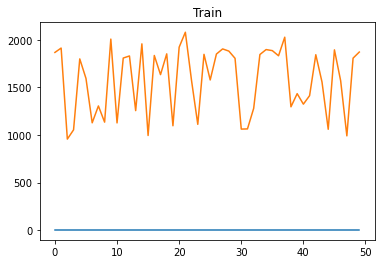

2/2 [==============================] - 1s 5ms/step


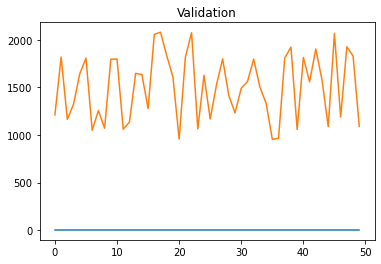

3/3 [==============================] - 0s 3ms/step


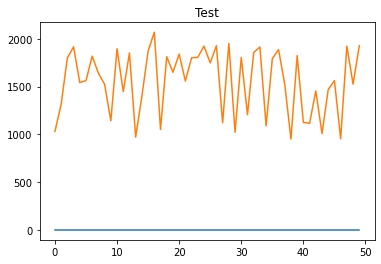

3/3 [==============================] - 0s 17ms/step


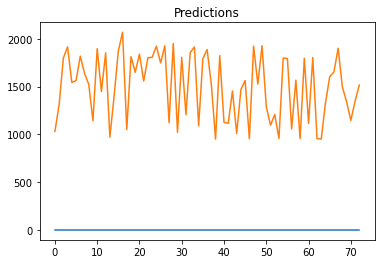

In [12]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
3/8 [==========>...................] - ETA: 0s - loss: 2670643.7500 - root_mean_squared_error: 1634.2104 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 461ms/step - loss: 2669461.5000 - root_mean_squared_error: 1633.8486 - val_loss: 2532581.0000 - val_root_mean_squared_error: 1591.4084
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2249983.2500 - root_mean_squared_error: 1499.9944

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 376ms/step - loss: 2254312.2500 - root_mean_squared_error: 1501.4368 - val_loss: 2145387.0000 - val_root_mean_squared_error: 1464.7140
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 1958819.2500 - root_mean_squared_error: 1399.5782

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 413ms/step - loss: 1953071.6250 - root_mean_squared_error: 1397.5234 - val_loss: 1717717.2500 - val_root_mean_squared_error: 1310.6171
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 1667240.3750 - root_mean_squared_error: 1291.2167

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 497ms/step - loss: 1614466.6250 - root_mean_squared_error: 1270.6166 - val_loss: 1301391.2500 - val_root_mean_squared_error: 1140.7854
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 1249756.1250 - root_mean_squared_error: 1117.9249

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 508ms/step - loss: 1250949.1250 - root_mean_squared_error: 1118.4584 - val_loss: 964988.5625 - val_root_mean_squared_error: 982.3383
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 1088377.2500 - root_mean_squared_error: 1043.2532

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 464ms/step - loss: 1071860.0000 - root_mean_squared_error: 1035.3068 - val_loss: 687493.9375 - val_root_mean_squared_error: 829.1525
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 797386.1875 - root_mean_squared_error: 892.9648  

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 432ms/step - loss: 805543.4375 - root_mean_squared_error: 897.5207 - val_loss: 456416.7812 - val_root_mean_squared_error: 675.5862
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 654288.5625 - root_mean_squared_error: 808.8810

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 2s 345ms/step - loss: 618678.3750 - root_mean_squared_error: 786.5611 - val_loss: 277398.0312 - val_root_mean_squared_error: 526.6859
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 413556.6250 - root_mean_squared_error: 643.0837

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 509ms/step - loss: 391127.4062 - root_mean_squared_error: 625.4018 - val_loss: 153446.7812 - val_root_mean_squared_error: 391.7229
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 267426.4375 - root_mean_squared_error: 517.1329

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 406ms/step - loss: 269501.8438 - root_mean_squared_error: 519.1357 - val_loss: 77376.6953 - val_root_mean_squared_error: 278.1667
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 199213.3750 - root_mean_squared_error: 446.3333

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 412ms/step - loss: 199213.3750 - root_mean_squared_error: 446.3333 - val_loss: 34813.5508 - val_root_mean_squared_error: 186.5839
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 170380.9375 - root_mean_squared_error: 412.7722

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 406ms/step - loss: 173041.5625 - root_mean_squared_error: 415.9826 - val_loss: 13670.1748 - val_root_mean_squared_error: 116.9195
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 204368.9062 - root_mean_squared_error: 452.0718

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 405ms/step - loss: 147998.2188 - root_mean_squared_error: 384.7054 - val_loss: 5374.4175 - val_root_mean_squared_error: 73.3104
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 206143.8281 - root_mean_squared_error: 454.0306

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 414ms/step - loss: 136669.8906 - root_mean_squared_error: 369.6889 - val_loss: 3761.5505 - val_root_mean_squared_error: 61.3315
Epoch 15/50
8/8 [==============================] - 0s 50ms/step - loss: 117907.8359 - root_mean_squared_error: 343.3771 - val_loss: 4481.0933 - val_root_mean_squared_error: 66.9410
Epoch 16/50
8/8 [==============================] - 0s 37ms/step - loss: 123324.2500 - root_mean_squared_error: 351.1755 - val_loss: 5499.8867 - val_root_mean_squared_error: 74.1612
Epoch 17/50
8/8 [==============================] - 0s 37ms/step - loss: 128455.4062 - root_mean_squared_error: 358.4068 - val_loss: 5675.9883 - val_root_mean_squared_error: 75.3392
Epoch 18/50
8/8 [==============================] - 0s 31ms/step - loss: 129872.7656 - root_mean_squared_error: 360.3786 - val_loss: 4897.1509 - val_root_mean_squared_error: 69.9796
Epoch 19/50
8/8 [==============================] - 0s 26ms/step - loss: 133657.3906 - root_mean_squared_er

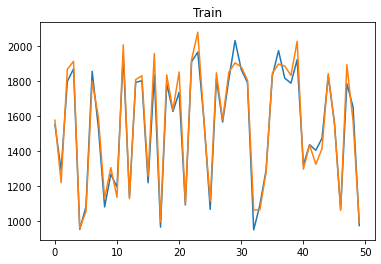

2/2 [==============================] - 0s 4ms/step


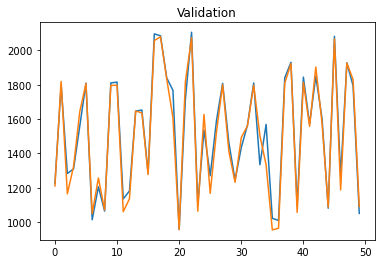

3/3 [==============================] - 0s 6ms/step


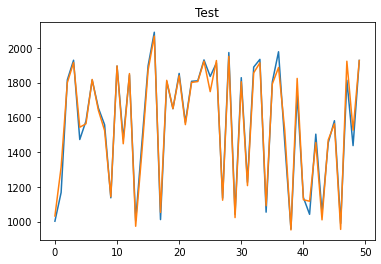

3/3 [==============================] - 0s 3ms/step


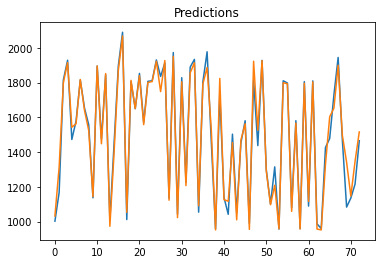

In [13]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [14]:
auto_cnn_mse

3239.0995506650884

### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2464427.0000 - root_mean_squared_error: 1569.8494

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 2s/step - loss: 2464427.0000 - root_mean_squared_error: 1569.8494 - val_loss: 2395607.7500 - val_root_mean_squared_error: 1547.7751
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2408385.5000 - root_mean_squared_error: 1551.8973

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2464140.2500 - root_mean_squared_error: 1569.7581 - val_loss: 2395417.7500 - val_root_mean_squared_error: 1547.7137
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2464449.0000 - root_mean_squared_error: 1569.8563

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2464449.0000 - root_mean_squared_error: 1569.8563 - val_loss: 2395295.5000 - val_root_mean_squared_error: 1547.6742
Epoch 4/50
4/8 [==============>...............] - ETA: 0s - loss: 2492197.7500 - root_mean_squared_error: 1578.6696

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2463910.2500 - root_mean_squared_error: 1569.6848 - val_loss: 2395182.5000 - val_root_mean_squared_error: 1547.6377
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2450777.7500 - root_mean_squared_error: 1565.4960

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2463830.0000 - root_mean_squared_error: 1569.6592 - val_loss: 2395019.5000 - val_root_mean_squared_error: 1547.5851
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2462266.7500 - root_mean_squared_error: 1569.1611

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2463768.5000 - root_mean_squared_error: 1569.6396 - val_loss: 2394657.0000 - val_root_mean_squared_error: 1547.4679
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2463261.7500 - root_mean_squared_error: 1569.4781

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2463261.7500 - root_mean_squared_error: 1569.4781 - val_loss: 2394280.7500 - val_root_mean_squared_error: 1547.3463
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2463257.5000 - root_mean_squared_error: 1569.4768

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2463257.5000 - root_mean_squared_error: 1569.4768 - val_loss: 2394148.5000 - val_root_mean_squared_error: 1547.3036
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2440828.5000 - root_mean_squared_error: 1562.3151

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2462851.5000 - root_mean_squared_error: 1569.3475 - val_loss: 2393968.0000 - val_root_mean_squared_error: 1547.2452
Epoch 10/50
4/8 [==============>...............] - ETA: 0s - loss: 2415331.0000 - root_mean_squared_error: 1554.1335

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2462434.2500 - root_mean_squared_error: 1569.2145 - val_loss: 2393418.0000 - val_root_mean_squared_error: 1547.0675
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 2488291.2500 - root_mean_squared_error: 1577.4319

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2461948.0000 - root_mean_squared_error: 1569.0596 - val_loss: 2393008.5000 - val_root_mean_squared_error: 1546.9352
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2461603.5000 - root_mean_squared_error: 1568.9498

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2461603.5000 - root_mean_squared_error: 1568.9498 - val_loss: 2392912.0000 - val_root_mean_squared_error: 1546.9041
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2452281.2500 - root_mean_squared_error: 1565.9761

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2461742.5000 - root_mean_squared_error: 1568.9941 - val_loss: 2392823.0000 - val_root_mean_squared_error: 1546.8754
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2461538.7500 - root_mean_squared_error: 1568.9292

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2461538.7500 - root_mean_squared_error: 1568.9292 - val_loss: 2392734.2500 - val_root_mean_squared_error: 1546.8466
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2253522.2500 - root_mean_squared_error: 1501.1736

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2461385.7500 - root_mean_squared_error: 1568.8804 - val_loss: 2392645.5000 - val_root_mean_squared_error: 1546.8177
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2460383.7500 - root_mean_squared_error: 1568.5610

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2461349.2500 - root_mean_squared_error: 1568.8688 - val_loss: 2392497.0000 - val_root_mean_squared_error: 1546.7699
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2473970.5000 - root_mean_squared_error: 1572.8860

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2461095.5000 - root_mean_squared_error: 1568.7880 - val_loss: 2392086.5000 - val_root_mean_squared_error: 1546.6372
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2477528.7500 - root_mean_squared_error: 1574.0167

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2460634.5000 - root_mean_squared_error: 1568.6410 - val_loss: 2391937.7500 - val_root_mean_squared_error: 1546.5891
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2111930.0000 - root_mean_squared_error: 1453.2480

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2460698.5000 - root_mean_squared_error: 1568.6614 - val_loss: 2391847.0000 - val_root_mean_squared_error: 1546.5598
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2460551.0000 - root_mean_squared_error: 1568.6144

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2460551.0000 - root_mean_squared_error: 1568.6144 - val_loss: 2391761.0000 - val_root_mean_squared_error: 1546.5320
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2447265.5000 - root_mean_squared_error: 1564.3738

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2460544.2500 - root_mean_squared_error: 1568.6122 - val_loss: 2391676.7500 - val_root_mean_squared_error: 1546.5046
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2440517.7500 - root_mean_squared_error: 1562.2157

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2460501.2500 - root_mean_squared_error: 1568.5985 - val_loss: 2391592.2500 - val_root_mean_squared_error: 1546.4774
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2460241.0000 - root_mean_squared_error: 1568.5155

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2460241.0000 - root_mean_squared_error: 1568.5155 - val_loss: 2391508.2500 - val_root_mean_squared_error: 1546.4502
Epoch 24/50
4/8 [==============>...............] - ETA: 0s - loss: 2494197.2500 - root_mean_squared_error: 1579.3027

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2460092.7500 - root_mean_squared_error: 1568.4683 - val_loss: 2391425.0000 - val_root_mean_squared_error: 1546.4232
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 2327659.0000 - root_mean_squared_error: 1525.6667

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2460249.2500 - root_mean_squared_error: 1568.5182 - val_loss: 2391341.7500 - val_root_mean_squared_error: 1546.3962
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2470088.2500 - root_mean_squared_error: 1571.6515

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2460248.5000 - root_mean_squared_error: 1568.5179 - val_loss: 2391258.5000 - val_root_mean_squared_error: 1546.3695
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2644094.0000 - root_mean_squared_error: 1626.0670

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2459936.7500 - root_mean_squared_error: 1568.4186 - val_loss: 2391175.5000 - val_root_mean_squared_error: 1546.3427
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 2511482.2500 - root_mean_squared_error: 1584.7656

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2459806.5000 - root_mean_squared_error: 1568.3771 - val_loss: 2391093.0000 - val_root_mean_squared_error: 1546.3159
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2470981.7500 - root_mean_squared_error: 1571.9357

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2459915.2500 - root_mean_squared_error: 1568.4117 - val_loss: 2391010.7500 - val_root_mean_squared_error: 1546.2893
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2439988.7500 - root_mean_squared_error: 1562.0464

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2459650.0000 - root_mean_squared_error: 1568.3271 - val_loss: 2390928.2500 - val_root_mean_squared_error: 1546.2627
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2565821.0000 - root_mean_squared_error: 1601.8180

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2459782.7500 - root_mean_squared_error: 1568.3695 - val_loss: 2390845.5000 - val_root_mean_squared_error: 1546.2360
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 2640846.0000 - root_mean_squared_error: 1625.0680

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2459501.0000 - root_mean_squared_error: 1568.2797 - val_loss: 2390762.7500 - val_root_mean_squared_error: 1546.2091
Epoch 33/50
4/8 [==============>...............] - ETA: 0s - loss: 2515740.0000 - root_mean_squared_error: 1586.1084

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2459223.7500 - root_mean_squared_error: 1568.1913 - val_loss: 2390680.2500 - val_root_mean_squared_error: 1546.1825
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2463664.7500 - root_mean_squared_error: 1569.6066

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2459451.2500 - root_mean_squared_error: 1568.2638 - val_loss: 2390598.0000 - val_root_mean_squared_error: 1546.1559
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 2300759.0000 - root_mean_squared_error: 1516.8253

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2459422.2500 - root_mean_squared_error: 1568.2545 - val_loss: 2390515.7500 - val_root_mean_squared_error: 1546.1294
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2459052.2500 - root_mean_squared_error: 1568.1366

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2459052.2500 - root_mean_squared_error: 1568.1366 - val_loss: 2390433.5000 - val_root_mean_squared_error: 1546.1027
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2668561.7500 - root_mean_squared_error: 1633.5734

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2459210.5000 - root_mean_squared_error: 1568.1870 - val_loss: 2390351.0000 - val_root_mean_squared_error: 1546.0760
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2459206.2500 - root_mean_squared_error: 1568.1857

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2459206.2500 - root_mean_squared_error: 1568.1857 - val_loss: 2390268.7500 - val_root_mean_squared_error: 1546.0494
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2604978.5000 - root_mean_squared_error: 1613.9946

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2458892.2500 - root_mean_squared_error: 1568.0856 - val_loss: 2390186.0000 - val_root_mean_squared_error: 1546.0226
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2272099.5000 - root_mean_squared_error: 1507.3485

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2459042.7500 - root_mean_squared_error: 1568.1335 - val_loss: 2390103.7500 - val_root_mean_squared_error: 1545.9961
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 2385429.2500 - root_mean_squared_error: 1544.4835

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2458689.0000 - root_mean_squared_error: 1568.0208 - val_loss: 2390021.5000 - val_root_mean_squared_error: 1545.9695
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2474541.7500 - root_mean_squared_error: 1573.0676

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2458735.7500 - root_mean_squared_error: 1568.0356 - val_loss: 2389938.7500 - val_root_mean_squared_error: 1545.9426
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2403771.7500 - root_mean_squared_error: 1550.4102

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2458506.0000 - root_mean_squared_error: 1567.9624 - val_loss: 2389856.7500 - val_root_mean_squared_error: 1545.9163
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2432324.0000 - root_mean_squared_error: 1559.5909

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2458415.7500 - root_mean_squared_error: 1567.9336 - val_loss: 2389774.2500 - val_root_mean_squared_error: 1545.8895
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2458578.2500 - root_mean_squared_error: 1567.9854

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2458578.2500 - root_mean_squared_error: 1567.9854 - val_loss: 2389692.7500 - val_root_mean_squared_error: 1545.8630
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2458296.0000 - root_mean_squared_error: 1567.8954

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2458296.0000 - root_mean_squared_error: 1567.8954 - val_loss: 2389610.0000 - val_root_mean_squared_error: 1545.8364
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2431237.5000 - root_mean_squared_error: 1559.2426

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2458306.5000 - root_mean_squared_error: 1567.8988 - val_loss: 2389528.2500 - val_root_mean_squared_error: 1545.8099
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2444296.0000 - root_mean_squared_error: 1563.4244

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2458349.7500 - root_mean_squared_error: 1567.9126 - val_loss: 2389445.2500 - val_root_mean_squared_error: 1545.7831
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 2441136.5000 - root_mean_squared_error: 1562.4137

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2458127.5000 - root_mean_squared_error: 1567.8417 - val_loss: 2389363.2500 - val_root_mean_squared_error: 1545.7565
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2449412.7500 - root_mean_squared_error: 1565.0599

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 1s 10ms/step


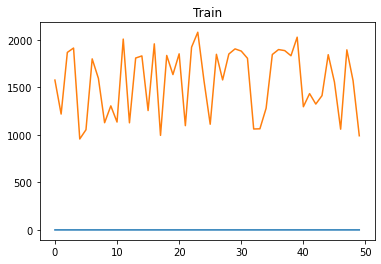

2/2 [==============================] - 1s 13ms/step


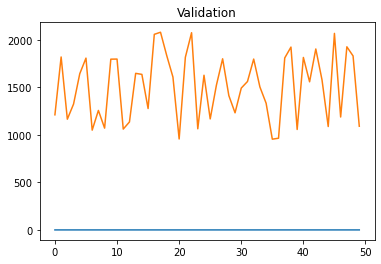

3/3 [==============================] - 0s 9ms/step


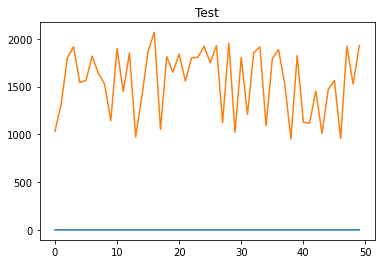

3/3 [==============================] - 0s 6ms/step


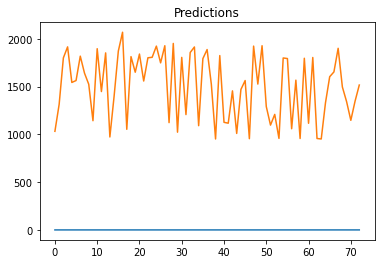

In [15]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [16]:
auto_gru_mse

2368048.3244272615

### LSTM

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2430039.0000 - root_mean_squared_error: 1558.8583 

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 2s/step - loss: 2463921.0000 - root_mean_squared_error: 1569.6882 - val_loss: 2395250.2500 - val_root_mean_squared_error: 1547.6595
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2495582.7500 - root_mean_squared_error: 1579.7413

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2463622.2500 - root_mean_squared_error: 1569.5930 - val_loss: 2395168.2500 - val_root_mean_squared_error: 1547.6331
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2426470.0000 - root_mean_squared_error: 1557.7130

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2463633.5000 - root_mean_squared_error: 1569.5966 - val_loss: 2395089.7500 - val_root_mean_squared_error: 1547.6078
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2463772.0000 - root_mean_squared_error: 1569.6407

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2463602.5000 - root_mean_squared_error: 1569.5867 - val_loss: 2395003.5000 - val_root_mean_squared_error: 1547.5798
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 2447319.5000 - root_mean_squared_error: 1564.3911

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2463481.7500 - root_mean_squared_error: 1569.5482 - val_loss: 2394883.7500 - val_root_mean_squared_error: 1547.5411
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2463291.7500 - root_mean_squared_error: 1569.4878

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2463291.7500 - root_mean_squared_error: 1569.4878 - val_loss: 2394712.7500 - val_root_mean_squared_error: 1547.4860
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2463057.7500 - root_mean_squared_error: 1569.4132

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2463057.7500 - root_mean_squared_error: 1569.4132 - val_loss: 2394159.0000 - val_root_mean_squared_error: 1547.3070
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2413320.7500 - root_mean_squared_error: 1553.4867

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2462835.5000 - root_mean_squared_error: 1569.3424 - val_loss: 2394050.2500 - val_root_mean_squared_error: 1547.2719
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2453635.7500 - root_mean_squared_error: 1566.4086

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2462750.2500 - root_mean_squared_error: 1569.3152 - val_loss: 2393979.7500 - val_root_mean_squared_error: 1547.2491
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 2525317.2500 - root_mean_squared_error: 1589.1246

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2462653.7500 - root_mean_squared_error: 1569.2844 - val_loss: 2393912.7500 - val_root_mean_squared_error: 1547.2274
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2462618.7500 - root_mean_squared_error: 1569.2733

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2462618.7500 - root_mean_squared_error: 1569.2733 - val_loss: 2393846.5000 - val_root_mean_squared_error: 1547.2061
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2477319.2500 - root_mean_squared_error: 1573.9502

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2462456.2500 - root_mean_squared_error: 1569.2216 - val_loss: 2393777.7500 - val_root_mean_squared_error: 1547.1838
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2448589.7500 - root_mean_squared_error: 1564.7970

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2462464.5000 - root_mean_squared_error: 1569.2241 - val_loss: 2393683.2500 - val_root_mean_squared_error: 1547.1533
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2444023.2500 - root_mean_squared_error: 1563.3372

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2462401.7500 - root_mean_squared_error: 1569.2042 - val_loss: 2393421.5000 - val_root_mean_squared_error: 1547.0687
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 2483322.5000 - root_mean_squared_error: 1575.8561

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2462164.7500 - root_mean_squared_error: 1569.1287 - val_loss: 2393165.0000 - val_root_mean_squared_error: 1546.9858
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2462149.5000 - root_mean_squared_error: 1569.1238

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2462149.5000 - root_mean_squared_error: 1569.1238 - val_loss: 2393070.0000 - val_root_mean_squared_error: 1546.9552
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2454219.7500 - root_mean_squared_error: 1566.5950

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2462018.7500 - root_mean_squared_error: 1569.0822 - val_loss: 2392995.2500 - val_root_mean_squared_error: 1546.9309
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2461969.0000 - root_mean_squared_error: 1569.0663

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2461969.0000 - root_mean_squared_error: 1569.0663 - val_loss: 2392923.7500 - val_root_mean_squared_error: 1546.9077
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 2425579.7500 - root_mean_squared_error: 1557.4272

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2461861.5000 - root_mean_squared_error: 1569.0320 - val_loss: 2392855.5000 - val_root_mean_squared_error: 1546.8857
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2437116.0000 - root_mean_squared_error: 1561.1265

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2461870.5000 - root_mean_squared_error: 1569.0349 - val_loss: 2392787.2500 - val_root_mean_squared_error: 1546.8636
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2461750.7500 - root_mean_squared_error: 1568.9967

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2461750.7500 - root_mean_squared_error: 1568.9967 - val_loss: 2392719.0000 - val_root_mean_squared_error: 1546.8417
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2461672.0000 - root_mean_squared_error: 1568.9717

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2461672.0000 - root_mean_squared_error: 1568.9717 - val_loss: 2392659.5000 - val_root_mean_squared_error: 1546.8224
Epoch 23/50
2/8 [======>.......................] - ETA: 0s - loss: 2613314.7500 - root_mean_squared_error: 1616.5750

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2461696.2500 - root_mean_squared_error: 1568.9794 - val_loss: 2392607.0000 - val_root_mean_squared_error: 1546.8054
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2461559.7500 - root_mean_squared_error: 1568.9359

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2461559.7500 - root_mean_squared_error: 1568.9359 - val_loss: 2392553.7500 - val_root_mean_squared_error: 1546.7882
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2449622.2500 - root_mean_squared_error: 1565.1270

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2461499.0000 - root_mean_squared_error: 1568.9165 - val_loss: 2392506.0000 - val_root_mean_squared_error: 1546.7728
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2461429.7500 - root_mean_squared_error: 1568.8944

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2461429.7500 - root_mean_squared_error: 1568.8944 - val_loss: 2392465.7500 - val_root_mean_squared_error: 1546.7598
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2474419.2500 - root_mean_squared_error: 1573.0287

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2461373.2500 - root_mean_squared_error: 1568.8765 - val_loss: 2392426.0000 - val_root_mean_squared_error: 1546.7468
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2461392.2500 - root_mean_squared_error: 1568.8824

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2461392.2500 - root_mean_squared_error: 1568.8824 - val_loss: 2392385.7500 - val_root_mean_squared_error: 1546.7339
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2461268.7500 - root_mean_squared_error: 1568.8431

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2461268.7500 - root_mean_squared_error: 1568.8431 - val_loss: 2392346.0000 - val_root_mean_squared_error: 1546.7211
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2363007.5000 - root_mean_squared_error: 1537.2076

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 9s 1s/step - loss: 2461243.5000 - root_mean_squared_error: 1568.8351 - val_loss: 2392306.2500 - val_root_mean_squared_error: 1546.7083
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 2179116.7500 - root_mean_squared_error: 1476.1832

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2461170.7500 - root_mean_squared_error: 1568.8119 - val_loss: 2392266.2500 - val_root_mean_squared_error: 1546.6953
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2459865.7500 - root_mean_squared_error: 1568.3959

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2461088.5000 - root_mean_squared_error: 1568.7856 - val_loss: 2392225.7500 - val_root_mean_squared_error: 1546.6821
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2461035.7500 - root_mean_squared_error: 1568.7689

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2461035.7500 - root_mean_squared_error: 1568.7689 - val_loss: 2392184.7500 - val_root_mean_squared_error: 1546.6689
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2460963.7500 - root_mean_squared_error: 1568.7460

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2460963.7500 - root_mean_squared_error: 1568.7460 - val_loss: 2392144.0000 - val_root_mean_squared_error: 1546.6558
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 2552867.0000 - root_mean_squared_error: 1597.7694

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2460973.7500 - root_mean_squared_error: 1568.7491 - val_loss: 2392103.5000 - val_root_mean_squared_error: 1546.6427
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 2434281.0000 - root_mean_squared_error: 1560.2183

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2460895.2500 - root_mean_squared_error: 1568.7241 - val_loss: 2392063.0000 - val_root_mean_squared_error: 1546.6295
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 2422621.2500 - root_mean_squared_error: 1556.4772

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2460812.7500 - root_mean_squared_error: 1568.6978 - val_loss: 2392022.0000 - val_root_mean_squared_error: 1546.6163
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 2456792.7500 - root_mean_squared_error: 1567.4159

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2460678.2500 - root_mean_squared_error: 1568.6549 - val_loss: 2391981.2500 - val_root_mean_squared_error: 1546.6031
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2606910.5000 - root_mean_squared_error: 1614.5930

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2460667.2500 - root_mean_squared_error: 1568.6514 - val_loss: 2391939.7500 - val_root_mean_squared_error: 1546.5897
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2429428.2500 - root_mean_squared_error: 1558.6624

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2460602.0000 - root_mean_squared_error: 1568.6306 - val_loss: 2391898.5000 - val_root_mean_squared_error: 1546.5764
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 2500740.0000 - root_mean_squared_error: 1581.3728

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2460580.2500 - root_mean_squared_error: 1568.6237 - val_loss: 2391857.0000 - val_root_mean_squared_error: 1546.5630
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 2631254.2500 - root_mean_squared_error: 1622.1141

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2460540.5000 - root_mean_squared_error: 1568.6110 - val_loss: 2391801.5000 - val_root_mean_squared_error: 1546.5450
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2418753.0000 - root_mean_squared_error: 1555.2340

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2460396.2500 - root_mean_squared_error: 1568.5651 - val_loss: 2391731.2500 - val_root_mean_squared_error: 1546.5223
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2434933.5000 - root_mean_squared_error: 1560.4274

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2460352.5000 - root_mean_squared_error: 1568.5510 - val_loss: 2391657.7500 - val_root_mean_squared_error: 1546.4987
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2295972.5000 - root_mean_squared_error: 1515.2467

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2460228.2500 - root_mean_squared_error: 1568.5115 - val_loss: 2391580.7500 - val_root_mean_squared_error: 1546.4736
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2481217.5000 - root_mean_squared_error: 1575.1881

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2460352.7500 - root_mean_squared_error: 1568.5511 - val_loss: 2391505.0000 - val_root_mean_squared_error: 1546.4492
Epoch 47/50
3/8 [==========>...................] - ETA: 0s - loss: 2653202.7500 - root_mean_squared_error: 1628.8655

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2460077.2500 - root_mean_squared_error: 1568.4634 - val_loss: 2391429.0000 - val_root_mean_squared_error: 1546.4246
Epoch 48/50
4/8 [==============>...............] - ETA: 0s - loss: 2392717.0000 - root_mean_squared_error: 1546.8409

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2460057.5000 - root_mean_squared_error: 1568.4570 - val_loss: 2391351.7500 - val_root_mean_squared_error: 1546.3997
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2332581.5000 - root_mean_squared_error: 1527.2792

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2459927.7500 - root_mean_squared_error: 1568.4156 - val_loss: 2391273.5000 - val_root_mean_squared_error: 1546.3743
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2447172.0000 - root_mean_squared_error: 1564.3440

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 2s 4ms/step


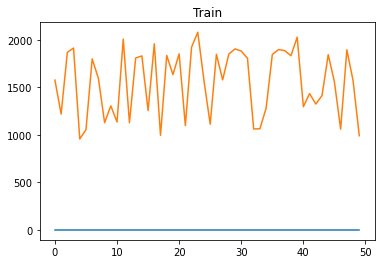

2/2 [==============================] - 1s 4ms/step


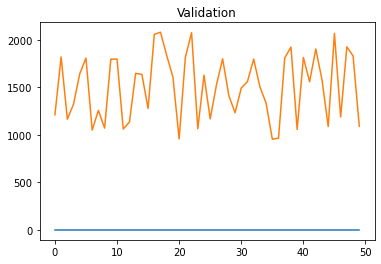

3/3 [==============================] - 0s 5ms/step


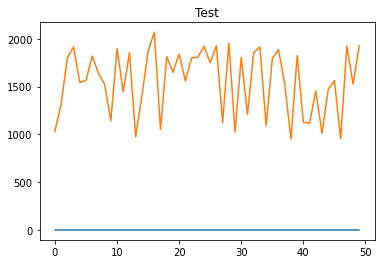

3/3 [==============================] - 0s 4ms/step


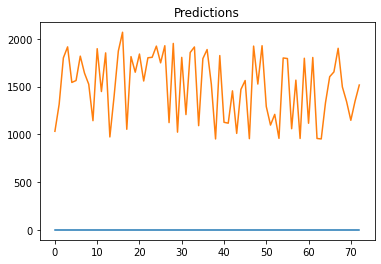

In [17]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [18]:
auto_lstm_mse

2369952.6315340945

### RNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2453321.5000 - root_mean_squared_error: 1566.3082 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 912ms/step - loss: 2453321.5000 - root_mean_squared_error: 1566.3082 - val_loss: 2384259.5000 - val_root_mean_squared_error: 1544.1047
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2453118.2500 - root_mean_squared_error: 1566.2434INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2453118.2500 - root_mean_squared_error: 1566.2434 - val_loss: 2384103.5000 - val_root_mean_squared_error: 1544.0543
Epoch 3/50
3/8 [==========>...................] - ETA: 0s - loss: 2444924.5000 - root_mean_squared_error: 1563.6255INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 915ms/step - loss: 2452816.5000 - root_mean_squared_error: 1566.1470 - val_loss: 2383949.2500 - val_root_mean_squared_error: 1544.0043
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2432708.2500 - root_mean_squared_error: 1559.7141INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 995ms/step - loss: 2452572.2500 - root_mean_squared_error: 1566.0691 - val_loss: 2383794.0000 - val_root_mean_squared_error: 1543.9541
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 2354891.0000 - root_mean_squared_error: 1534.5654INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 966ms/step - loss: 2452324.5000 - root_mean_squared_error: 1565.9900 - val_loss: 2383615.5000 - val_root_mean_squared_error: 1543.8962
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 2367298.7500 - root_mean_squared_error: 1538.6029INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 777ms/step - loss: 2451618.0000 - root_mean_squared_error: 1565.7644 - val_loss: 2383073.5000 - val_root_mean_squared_error: 1543.7207
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 2752360.0000 - root_mean_squared_error: 1659.0238INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 795ms/step - loss: 2451648.7500 - root_mean_squared_error: 1565.7742 - val_loss: 2382007.0000 - val_root_mean_squared_error: 1543.3752
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 2298264.0000 - root_mean_squared_error: 1516.0027INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 688ms/step - loss: 2450414.5000 - root_mean_squared_error: 1565.3800 - val_loss: 2381372.7500 - val_root_mean_squared_error: 1543.1697
Epoch 9/50
4/8 [==============>...............] - ETA: 0s - loss: 2438234.5000 - root_mean_squared_error: 1561.4847INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 911ms/step - loss: 2449345.7500 - root_mean_squared_error: 1565.0386 - val_loss: 2380053.2500 - val_root_mean_squared_error: 1542.7421
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2448683.7500 - root_mean_squared_error: 1564.8270INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 775ms/step - loss: 2448683.7500 - root_mean_squared_error: 1564.8270 - val_loss: 2379782.0000 - val_root_mean_squared_error: 1542.6542
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 2453065.5000 - root_mean_squared_error: 1566.2266INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 732ms/step - loss: 2448248.2500 - root_mean_squared_error: 1564.6879 - val_loss: 2379620.2500 - val_root_mean_squared_error: 1542.6016
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2463989.7500 - root_mean_squared_error: 1569.7101INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 834ms/step - loss: 2448423.5000 - root_mean_squared_error: 1564.7439 - val_loss: 2379464.0000 - val_root_mean_squared_error: 1542.5511
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2259590.5000 - root_mean_squared_error: 1503.1935INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2447808.2500 - root_mean_squared_error: 1564.5472 - val_loss: 2379309.7500 - val_root_mean_squared_error: 1542.5011
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2448079.2500 - root_mean_squared_error: 1564.6339INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 880ms/step - loss: 2448079.2500 - root_mean_squared_error: 1564.6339 - val_loss: 2379155.7500 - val_root_mean_squared_error: 1542.4512
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2447944.5000 - root_mean_squared_error: 1564.5908INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 911ms/step - loss: 2447944.5000 - root_mean_squared_error: 1564.5908 - val_loss: 2379000.7500 - val_root_mean_squared_error: 1542.4010
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 2428390.0000 - root_mean_squared_error: 1558.3292INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 772ms/step - loss: 2447872.0000 - root_mean_squared_error: 1564.5676 - val_loss: 2378847.5000 - val_root_mean_squared_error: 1542.3513
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2440246.2500 - root_mean_squared_error: 1562.1288INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 916ms/step - loss: 2447404.5000 - root_mean_squared_error: 1564.4182 - val_loss: 2378693.7500 - val_root_mean_squared_error: 1542.3015
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2447312.5000 - root_mean_squared_error: 1564.3889INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 845ms/step - loss: 2447312.5000 - root_mean_squared_error: 1564.3889 - val_loss: 2378540.2500 - val_root_mean_squared_error: 1542.2517
Epoch 19/50
1/8 [==>...........................] - ETA: 0s - loss: 2410781.0000 - root_mean_squared_error: 1552.6689INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 934ms/step - loss: 2446957.2500 - root_mean_squared_error: 1564.2753 - val_loss: 2378386.2500 - val_root_mean_squared_error: 1542.2018
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2438025.2500 - root_mean_squared_error: 1561.4177INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 734ms/step - loss: 2446696.2500 - root_mean_squared_error: 1564.1919 - val_loss: 2378230.5000 - val_root_mean_squared_error: 1542.1512
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2446909.7500 - root_mean_squared_error: 1564.2601INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2446909.7500 - root_mean_squared_error: 1564.2601 - val_loss: 2378074.5000 - val_root_mean_squared_error: 1542.1007
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2446683.7500 - root_mean_squared_error: 1564.1879INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 718ms/step - loss: 2446683.7500 - root_mean_squared_error: 1564.1879 - val_loss: 2377918.5000 - val_root_mean_squared_error: 1542.0500
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2436812.7500 - root_mean_squared_error: 1561.0294INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 661ms/step - loss: 2446355.5000 - root_mean_squared_error: 1564.0830 - val_loss: 2377764.5000 - val_root_mean_squared_error: 1542.0001
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2222920.0000 - root_mean_squared_error: 1490.9460INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 944ms/step - loss: 2446267.2500 - root_mean_squared_error: 1564.0547 - val_loss: 2377610.0000 - val_root_mean_squared_error: 1541.9501
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 2414499.0000 - root_mean_squared_error: 1553.8658INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2446614.2500 - root_mean_squared_error: 1564.1656 - val_loss: 2377456.0000 - val_root_mean_squared_error: 1541.9001
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2424709.0000 - root_mean_squared_error: 1557.1477INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 828ms/step - loss: 2445531.2500 - root_mean_squared_error: 1563.8195 - val_loss: 2377301.7500 - val_root_mean_squared_error: 1541.8501
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2415765.5000 - root_mean_squared_error: 1554.2733INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 792ms/step - loss: 2446052.5000 - root_mean_squared_error: 1563.9861 - val_loss: 2377146.5000 - val_root_mean_squared_error: 1541.7998
Epoch 28/50
4/8 [==============>...............] - ETA: 0s - loss: 2350352.0000 - root_mean_squared_error: 1533.0858INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 734ms/step - loss: 2445528.5000 - root_mean_squared_error: 1563.8186 - val_loss: 2376993.0000 - val_root_mean_squared_error: 1541.7500
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2603861.0000 - root_mean_squared_error: 1613.6483INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 876ms/step - loss: 2445698.0000 - root_mean_squared_error: 1563.8728 - val_loss: 2376839.5000 - val_root_mean_squared_error: 1541.7002
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 2410806.2500 - root_mean_squared_error: 1552.6771INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 795ms/step - loss: 2445979.7500 - root_mean_squared_error: 1563.9629 - val_loss: 2376685.7500 - val_root_mean_squared_error: 1541.6504
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2445096.0000 - root_mean_squared_error: 1563.6803INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 678ms/step - loss: 2445096.0000 - root_mean_squared_error: 1563.6803 - val_loss: 2376531.7500 - val_root_mean_squared_error: 1541.6003
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 2397722.5000 - root_mean_squared_error: 1548.4581INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 789ms/step - loss: 2444977.7500 - root_mean_squared_error: 1563.6425 - val_loss: 2376377.0000 - val_root_mean_squared_error: 1541.5502
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2444955.2500 - root_mean_squared_error: 1563.6353INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 906ms/step - loss: 2444955.2500 - root_mean_squared_error: 1563.6353 - val_loss: 2376223.2500 - val_root_mean_squared_error: 1541.5002
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2441401.2500 - root_mean_squared_error: 1562.4984INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 781ms/step - loss: 2444415.2500 - root_mean_squared_error: 1563.4625 - val_loss: 2376067.7500 - val_root_mean_squared_error: 1541.4498
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2427520.7500 - root_mean_squared_error: 1558.0503INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 754ms/step - loss: 2444556.7500 - root_mean_squared_error: 1563.5078 - val_loss: 2375912.7500 - val_root_mean_squared_error: 1541.3997
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2430300.5000 - root_mean_squared_error: 1558.9421INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 722ms/step - loss: 2444516.7500 - root_mean_squared_error: 1563.4950 - val_loss: 2375757.7500 - val_root_mean_squared_error: 1541.3494
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 2662600.7500 - root_mean_squared_error: 1631.7478INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 932ms/step - loss: 2444479.7500 - root_mean_squared_error: 1563.4832 - val_loss: 2375602.5000 - val_root_mean_squared_error: 1541.2990
Epoch 38/50
1/8 [==>...........................] - ETA: 0s - loss: 2204852.7500 - root_mean_squared_error: 1484.8746INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 711ms/step - loss: 2444137.5000 - root_mean_squared_error: 1563.3738 - val_loss: 2375450.0000 - val_root_mean_squared_error: 1541.2495
Epoch 39/50
1/8 [==>...........................] - ETA: 0s - loss: 2352760.5000 - root_mean_squared_error: 1533.8711INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 790ms/step - loss: 2444003.0000 - root_mean_squared_error: 1563.3307 - val_loss: 2375295.7500 - val_root_mean_squared_error: 1541.1995
Epoch 40/50
1/8 [==>...........................] - ETA: 0s - loss: 2439867.2500 - root_mean_squared_error: 1562.0074INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 866ms/step - loss: 2444135.5000 - root_mean_squared_error: 1563.3732 - val_loss: 2375141.5000 - val_root_mean_squared_error: 1541.1495
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2629177.5000 - root_mean_squared_error: 1621.4739INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2444056.7500 - root_mean_squared_error: 1563.3479 - val_loss: 2374989.0000 - val_root_mean_squared_error: 1541.1000
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 2204665.5000 - root_mean_squared_error: 1484.8116INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 726ms/step - loss: 2443377.0000 - root_mean_squared_error: 1563.1305 - val_loss: 2374838.0000 - val_root_mean_squared_error: 1541.0509
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 2662508.5000 - root_mean_squared_error: 1631.7195INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 806ms/step - loss: 2443431.2500 - root_mean_squared_error: 1563.1478 - val_loss: 2374685.7500 - val_root_mean_squared_error: 1541.0016
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2811394.2500 - root_mean_squared_error: 1676.7213INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 732ms/step - loss: 2443020.2500 - root_mean_squared_error: 1563.0164 - val_loss: 2374532.5000 - val_root_mean_squared_error: 1540.9518
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2401611.5000 - root_mean_squared_error: 1549.7134INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 737ms/step - loss: 2443273.7500 - root_mean_squared_error: 1563.0975 - val_loss: 2374378.5000 - val_root_mean_squared_error: 1540.9019
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2442793.0000 - root_mean_squared_error: 1562.9437INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 961ms/step - loss: 2442793.0000 - root_mean_squared_error: 1562.9437 - val_loss: 2374224.5000 - val_root_mean_squared_error: 1540.8519
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 2144076.0000 - root_mean_squared_error: 1464.2664INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 799ms/step - loss: 2442014.5000 - root_mean_squared_error: 1562.6946 - val_loss: 2374071.5000 - val_root_mean_squared_error: 1540.8022
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 2789918.5000 - root_mean_squared_error: 1670.3049INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 789ms/step - loss: 2442557.7500 - root_mean_squared_error: 1562.8684 - val_loss: 2373917.5000 - val_root_mean_squared_error: 1540.7522
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 2722171.7500 - root_mean_squared_error: 1649.9005INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2442977.0000 - root_mean_squared_error: 1563.0026 - val_loss: 2373765.7500 - val_root_mean_squared_error: 1540.7030
Epoch 50/50
1/8 [==>...........................] - ETA: 0s - loss: 2862257.2500 - root_mean_squared_error: 1691.8207INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 3ms/step


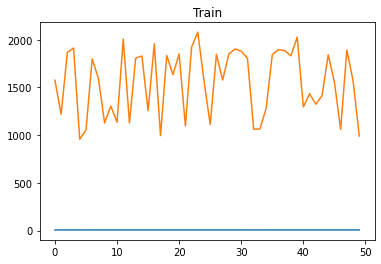

2/2 [==============================] - 1s 4ms/step


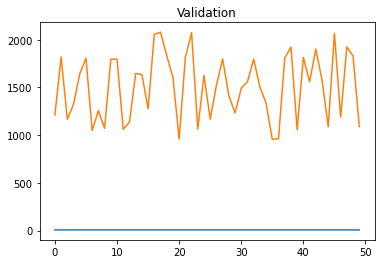

3/3 [==============================] - 0s 3ms/step


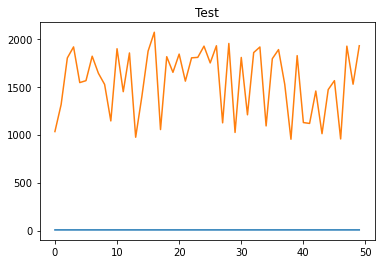

3/3 [==============================] - 0s 55ms/step


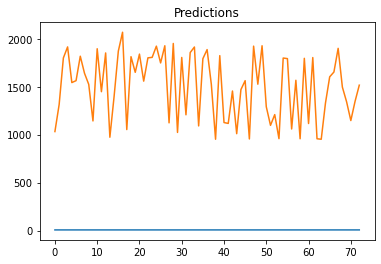

In [19]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [20]:
auto_rnn_mse

2352469.490165461

# Moving Average with Encoder

### CNN

Epoch 1/10
6/8 [=====================>........] - ETA: 0s - loss: 2984627.7500 - root_mean_squared_error: 1727.6075 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 569ms/step - loss: 2985433.7500 - root_mean_squared_error: 1727.8408 - val_loss: 2291398.5000 - val_root_mean_squared_error: 1513.7367
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 2597214.7500 - root_mean_squared_error: 1611.5876

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 805ms/step - loss: 2597214.7500 - root_mean_squared_error: 1611.5876 - val_loss: 1983921.0000 - val_root_mean_squared_error: 1408.5173
Epoch 3/10
5/8 [=================>............] - ETA: 0s - loss: 2377614.5000 - root_mean_squared_error: 1541.9515

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 702ms/step - loss: 2353500.5000 - root_mean_squared_error: 1534.1123 - val_loss: 1838424.1250 - val_root_mean_squared_error: 1355.8850
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 2070129.5000 - root_mean_squared_error: 1438.7944

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 475ms/step - loss: 2070129.5000 - root_mean_squared_error: 1438.7944 - val_loss: 1676215.1250 - val_root_mean_squared_error: 1294.6873
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 1856376.6250 - root_mean_squared_error: 1362.4891

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 422ms/step - loss: 1856376.6250 - root_mean_squared_error: 1362.4891 - val_loss: 1510978.8750 - val_root_mean_squared_error: 1229.2188
Epoch 6/10
6/8 [=====================>........] - ETA: 0s - loss: 1799516.1250 - root_mean_squared_error: 1341.4604

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 566ms/step - loss: 1771327.8750 - root_mean_squared_error: 1330.9125 - val_loss: 1349150.8750 - val_root_mean_squared_error: 1161.5295
Epoch 7/10
7/8 [=========================>....] - ETA: 0s - loss: 1520624.3750 - root_mean_squared_error: 1233.1360

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 618ms/step - loss: 1504466.1250 - root_mean_squared_error: 1226.5668 - val_loss: 1187433.5000 - val_root_mean_squared_error: 1089.6942
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 1348234.1250 - root_mean_squared_error: 1161.1349

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 423ms/step - loss: 1345973.2500 - root_mean_squared_error: 1160.1609 - val_loss: 1030150.9375 - val_root_mean_squared_error: 1014.9635
Epoch 9/10
7/8 [=========================>....] - ETA: 0s - loss: 1283516.3750 - root_mean_squared_error: 1132.9238

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 506ms/step - loss: 1273228.1250 - root_mean_squared_error: 1128.3741 - val_loss: 880398.1875 - val_root_mean_squared_error: 938.2953
Epoch 10/10
6/8 [=====================>........] - ETA: 0s - loss: 1053906.0000 - root_mean_squared_error: 1026.5992

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 0s 9ms/step


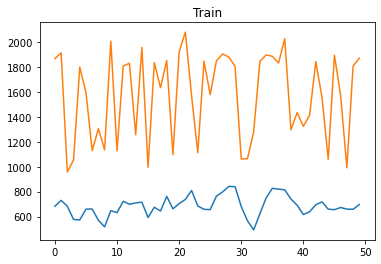

2/2 [==============================] - 0s 4ms/step


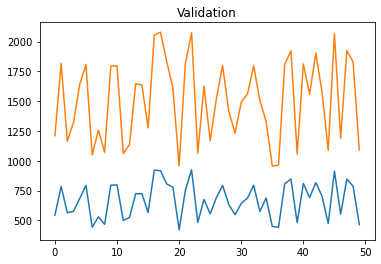

3/3 [==============================] - 0s 11ms/step


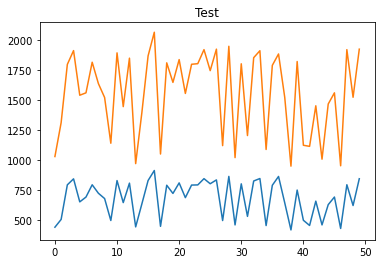

3/3 [==============================] - 0s 8ms/step


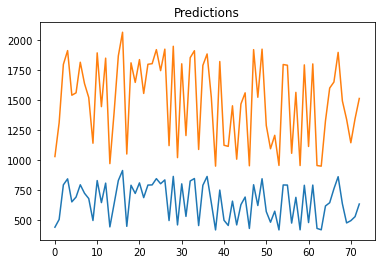

In [21]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
mavg_auto_cnn_mse

748625.6103484012

### RNN

Epoch 1/10
6/8 [=====================>........] - ETA: 0s - loss: 2470995.0000 - root_mean_squared_error: 1571.9399 INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 997ms/step - loss: 2469748.5000 - root_mean_squared_error: 1571.5433 - val_loss: 2396851.7500 - val_root_mean_squared_error: 1548.1769
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 2456647.7500 - root_mean_squared_error: 1567.3698INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 754ms/step - loss: 2469755.5000 - root_mean_squared_error: 1571.5455 - val_loss: 2396696.2500 - val_root_mean_squared_error: 1548.1267
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 2469348.2500 - root_mean_squared_error: 1571.4160INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 629ms/step - loss: 2469348.2500 - root_mean_squared_error: 1571.4160 - val_loss: 2396539.5000 - val_root_mean_squared_error: 1548.0759
Epoch 4/10
1/8 [==>...........................] - ETA: 0s - loss: 2545548.2500 - root_mean_squared_error: 1595.4774INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2469310.2500 - root_mean_squared_error: 1571.4039 - val_loss: 2396367.0000 - val_root_mean_squared_error: 1548.0204
Epoch 5/10
6/8 [=====================>........] - ETA: 0s - loss: 2489198.0000 - root_mean_squared_error: 1577.7192INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 796ms/step - loss: 2469069.7500 - root_mean_squared_error: 1571.3274 - val_loss: 2396013.5000 - val_root_mean_squared_error: 1547.9062
Epoch 6/10
6/8 [=====================>........] - ETA: 0s - loss: 2393033.2500 - root_mean_squared_error: 1546.9432INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 818ms/step - loss: 2468865.5000 - root_mean_squared_error: 1571.2625 - val_loss: 2394799.5000 - val_root_mean_squared_error: 1547.5140
Epoch 7/10
4/8 [==============>...............] - ETA: 0s - loss: 2354493.5000 - root_mean_squared_error: 1534.4359INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2467011.7500 - root_mean_squared_error: 1570.6724 - val_loss: 2394121.7500 - val_root_mean_squared_error: 1547.2949
Epoch 8/10
4/8 [==============>...............] - ETA: 0s - loss: 2490334.0000 - root_mean_squared_error: 1578.0792INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 653ms/step - loss: 2466678.0000 - root_mean_squared_error: 1570.5662 - val_loss: 2392765.0000 - val_root_mean_squared_error: 1546.8564
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 2465364.0000 - root_mean_squared_error: 1570.1477INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 790ms/step - loss: 2465364.0000 - root_mean_squared_error: 1570.1477 - val_loss: 2392321.5000 - val_root_mean_squared_error: 1546.7131
Epoch 10/10
6/8 [=====================>........] - ETA: 0s - loss: 2477366.7500 - root_mean_squared_error: 1573.9653INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 2s 5ms/step


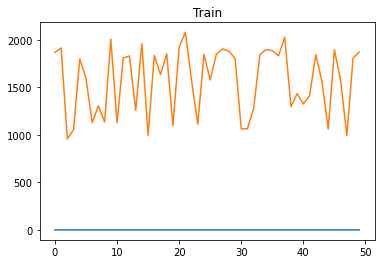

2/2 [==============================] - 1s 12ms/step


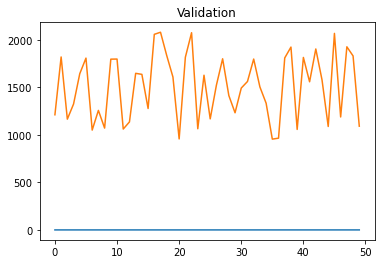

3/3 [==============================] - 0s 3ms/step


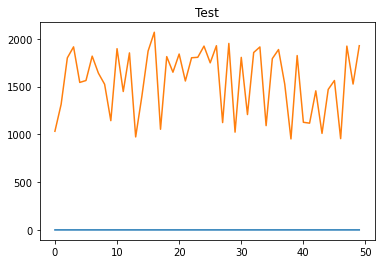

3/3 [==============================] - 0s 12ms/step


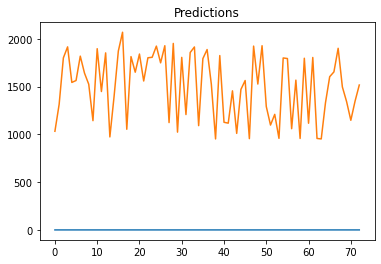

In [23]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [24]:
mavg_auto_rnn_mse

2370911.2540853163

### GRU

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 2470009.7500 - root_mean_squared_error: 1571.6265 

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 2s/step - loss: 2470009.7500 - root_mean_squared_error: 1571.6265 - val_loss: 2397042.5000 - val_root_mean_squared_error: 1548.2385
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 2433087.7500 - root_mean_squared_error: 1559.8358

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2470216.0000 - root_mean_squared_error: 1571.6921 - val_loss: 2396897.7500 - val_root_mean_squared_error: 1548.1918
Epoch 3/10
6/8 [=====================>........] - ETA: 0s - loss: 2459201.0000 - root_mean_squared_error: 1568.1840

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2469846.2500 - root_mean_squared_error: 1571.5745 - val_loss: 2396630.0000 - val_root_mean_squared_error: 1548.1053
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 2469415.5000 - root_mean_squared_error: 1571.4374

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2469415.5000 - root_mean_squared_error: 1571.4374 - val_loss: 2396082.0000 - val_root_mean_squared_error: 1547.9283
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 2468894.2500 - root_mean_squared_error: 1571.2715

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2468894.2500 - root_mean_squared_error: 1571.2715 - val_loss: 2395610.0000 - val_root_mean_squared_error: 1547.7759
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 2468582.0000 - root_mean_squared_error: 1571.1721

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 9s 1s/step - loss: 2468582.0000 - root_mean_squared_error: 1571.1721 - val_loss: 2395392.7500 - val_root_mean_squared_error: 1547.7057
Epoch 7/10
6/8 [=====================>........] - ETA: 0s - loss: 2453896.2500 - root_mean_squared_error: 1566.4917

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 2468178.7500 - root_mean_squared_error: 1571.0438 - val_loss: 2395190.5000 - val_root_mean_squared_error: 1547.6403
Epoch 8/10
5/8 [=================>............] - ETA: 0s - loss: 2503132.5000 - root_mean_squared_error: 1582.1292

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2468061.2500 - root_mean_squared_error: 1571.0065 - val_loss: 2394899.2500 - val_root_mean_squared_error: 1547.5461
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 2467658.5000 - root_mean_squared_error: 1570.8783

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2467658.5000 - root_mean_squared_error: 1570.8783 - val_loss: 2394767.5000 - val_root_mean_squared_error: 1547.5037
Epoch 10/10
7/8 [=========================>....] - ETA: 0s - loss: 2478823.2500 - root_mean_squared_error: 1574.4279

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 3s 5ms/step


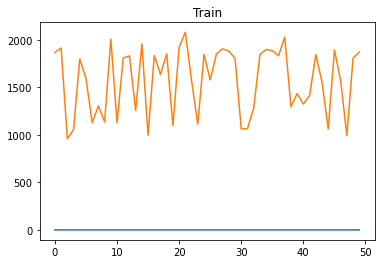

2/2 [==============================] - 3s 17ms/step


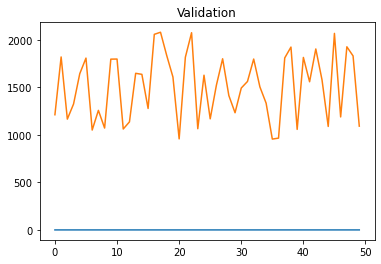

3/3 [==============================] - 0s 4ms/step


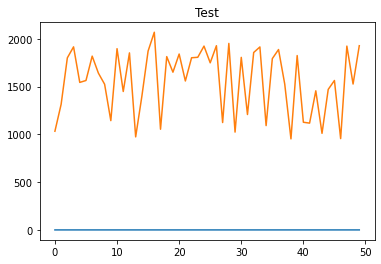

3/3 [==============================] - 0s 3ms/step


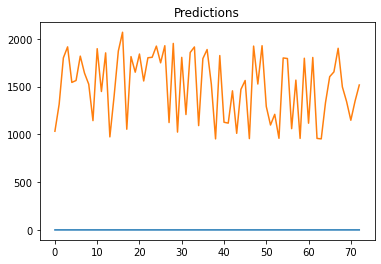

In [25]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [26]:
mavg_auto_gru_mse

2373404.2120548245

### LSTM

Epoch 1/10
1/8 [==>...........................] - ETA: 1:00 - loss: 2353360.2500 - root_mean_squared_error: 1534.0665

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 3s/step - loss: 2467881.7500 - root_mean_squared_error: 1570.9493 - val_loss: 2394834.2500 - val_root_mean_squared_error: 1547.5251
Epoch 2/10
7/8 [=========================>....] - ETA: 0s - loss: 2475106.5000 - root_mean_squared_error: 1573.2471

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2467820.0000 - root_mean_squared_error: 1570.9297 - val_loss: 2394674.0000 - val_root_mean_squared_error: 1547.4734
Epoch 3/10
1/8 [==>...........................] - ETA: 0s - loss: 2154777.5000 - root_mean_squared_error: 1467.9160

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2467648.0000 - root_mean_squared_error: 1570.8749 - val_loss: 2394562.0000 - val_root_mean_squared_error: 1547.4373
Epoch 4/10
5/8 [=================>............] - ETA: 0s - loss: 2488659.5000 - root_mean_squared_error: 1577.5486

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2467606.2500 - root_mean_squared_error: 1570.8616 - val_loss: 2394417.5000 - val_root_mean_squared_error: 1547.3905
Epoch 5/10
6/8 [=====================>........] - ETA: 0s - loss: 2483873.7500 - root_mean_squared_error: 1576.0310

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2467141.2500 - root_mean_squared_error: 1570.7136 - val_loss: 2393969.7500 - val_root_mean_squared_error: 1547.2458
Epoch 6/10
5/8 [=================>............] - ETA: 0s - loss: 2522039.0000 - root_mean_squared_error: 1588.0929

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2466773.0000 - root_mean_squared_error: 1570.5964 - val_loss: 2393630.2500 - val_root_mean_squared_error: 1547.1361
Epoch 7/10
5/8 [=================>............] - ETA: 0s - loss: 2500921.2500 - root_mean_squared_error: 1581.4302

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2466573.5000 - root_mean_squared_error: 1570.5328 - val_loss: 2393525.0000 - val_root_mean_squared_error: 1547.1022
Epoch 8/10
6/8 [=====================>........] - ETA: 0s - loss: 2515809.0000 - root_mean_squared_error: 1586.1302

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2466451.0000 - root_mean_squared_error: 1570.4939 - val_loss: 2393472.2500 - val_root_mean_squared_error: 1547.0851
Epoch 9/10
7/8 [=========================>....] - ETA: 0s - loss: 2459809.2500 - root_mean_squared_error: 1568.3779

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2466377.5000 - root_mean_squared_error: 1570.4705 - val_loss: 2393429.5000 - val_root_mean_squared_error: 1547.0713
Epoch 10/10
4/8 [==============>...............] - ETA: 0s - loss: 2472361.0000 - root_mean_squared_error: 1572.3743

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 2s 4ms/step


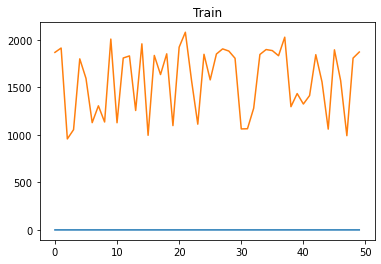

2/2 [==============================] - 2s 7ms/step


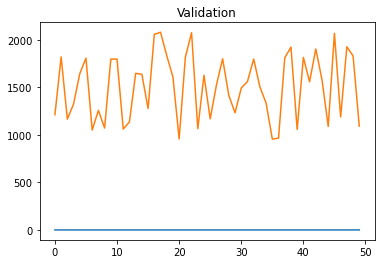

3/3 [==============================] - 0s 5ms/step


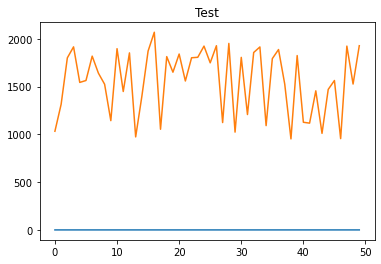

3/3 [==============================] - 0s 5ms/step


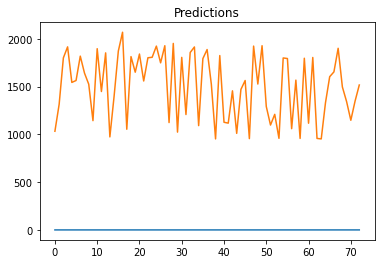

In [27]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [28]:
mavg_auto_lstm_mse

2372128.0496789482

# Hybrid

## General

### CNN LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2461735.5000 - root_mean_squared_error: 1568.9918

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 38s 4s/step - loss: 2461735.5000 - root_mean_squared_error: 1568.9918 - val_loss: 2392613.2500 - val_root_mean_squared_error: 1546.8074
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2466529.5000 - root_mean_squared_error: 1570.5189

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2461185.7500 - root_mean_squared_error: 1568.8167 - val_loss: 2392175.0000 - val_root_mean_squared_error: 1546.6658
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2460771.2500 - root_mean_squared_error: 1568.6846

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2460771.2500 - root_mean_squared_error: 1568.6846 - val_loss: 2391728.0000 - val_root_mean_squared_error: 1546.5212
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2460225.7500 - root_mean_squared_error: 1568.5106

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2460225.7500 - root_mean_squared_error: 1568.5106 - val_loss: 2391192.2500 - val_root_mean_squared_error: 1546.3480
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2459547.5000 - root_mean_squared_error: 1568.2944

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2459547.5000 - root_mean_squared_error: 1568.2944 - val_loss: 2390439.2500 - val_root_mean_squared_error: 1546.1045
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2458990.0000 - root_mean_squared_error: 1568.1167

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2458990.0000 - root_mean_squared_error: 1568.1167 - val_loss: 2390030.2500 - val_root_mean_squared_error: 1545.9723
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2462263.7500 - root_mean_squared_error: 1569.1602

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 4s/step - loss: 2458608.5000 - root_mean_squared_error: 1567.9951 - val_loss: 2389655.7500 - val_root_mean_squared_error: 1545.8512
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2458226.7500 - root_mean_squared_error: 1567.8733

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2458226.7500 - root_mean_squared_error: 1567.8733 - val_loss: 2389276.5000 - val_root_mean_squared_error: 1545.7285
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2477402.5000 - root_mean_squared_error: 1573.9767

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2457845.5000 - root_mean_squared_error: 1567.7517 - val_loss: 2388906.5000 - val_root_mean_squared_error: 1545.6089
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2457594.5000 - root_mean_squared_error: 1567.6716

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2457474.5000 - root_mean_squared_error: 1567.6334 - val_loss: 2388541.7500 - val_root_mean_squared_error: 1545.4907
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2457104.0000 - root_mean_squared_error: 1567.5153

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2457104.0000 - root_mean_squared_error: 1567.5153 - val_loss: 2388168.7500 - val_root_mean_squared_error: 1545.3701
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2456725.2500 - root_mean_squared_error: 1567.3944

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2456725.2500 - root_mean_squared_error: 1567.3944 - val_loss: 2387797.5000 - val_root_mean_squared_error: 1545.2500
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2456345.0000 - root_mean_squared_error: 1567.2731

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2456345.0000 - root_mean_squared_error: 1567.2731 - val_loss: 2387394.0000 - val_root_mean_squared_error: 1545.1194
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2441800.5000 - root_mean_squared_error: 1562.6261

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2455902.5000 - root_mean_squared_error: 1567.1320 - val_loss: 2386950.2500 - val_root_mean_squared_error: 1544.9758
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2434967.7500 - root_mean_squared_error: 1560.4384

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2455479.7500 - root_mean_squared_error: 1566.9971 - val_loss: 2386529.0000 - val_root_mean_squared_error: 1544.8394
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2445732.0000 - root_mean_squared_error: 1563.8837

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2455045.5000 - root_mean_squared_error: 1566.8585 - val_loss: 2386092.5000 - val_root_mean_squared_error: 1544.6982
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2454599.5000 - root_mean_squared_error: 1566.7162

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2454599.5000 - root_mean_squared_error: 1566.7162 - val_loss: 2385644.7500 - val_root_mean_squared_error: 1544.5532
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2456260.2500 - root_mean_squared_error: 1567.2461

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2454144.2500 - root_mean_squared_error: 1566.5708 - val_loss: 2385186.5000 - val_root_mean_squared_error: 1544.4049
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2470287.7500 - root_mean_squared_error: 1571.7150

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2453677.0000 - root_mean_squared_error: 1566.4218 - val_loss: 2384721.5000 - val_root_mean_squared_error: 1544.2544
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2438267.2500 - root_mean_squared_error: 1561.4952

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2453202.7500 - root_mean_squared_error: 1566.2704 - val_loss: 2384250.5000 - val_root_mean_squared_error: 1544.1018
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2452726.5000 - root_mean_squared_error: 1566.1183

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2452726.5000 - root_mean_squared_error: 1566.1183 - val_loss: 2383770.0000 - val_root_mean_squared_error: 1543.9463
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2462523.5000 - root_mean_squared_error: 1569.2429

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2452241.2500 - root_mean_squared_error: 1565.9634 - val_loss: 2383294.2500 - val_root_mean_squared_error: 1543.7921
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2451764.0000 - root_mean_squared_error: 1565.8109

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2451764.0000 - root_mean_squared_error: 1565.8109 - val_loss: 2382830.2500 - val_root_mean_squared_error: 1543.6418
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2463874.7500 - root_mean_squared_error: 1569.6735

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2451302.0000 - root_mean_squared_error: 1565.6635 - val_loss: 2382381.2500 - val_root_mean_squared_error: 1543.4965
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2450855.2500 - root_mean_squared_error: 1565.5208

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2450855.2500 - root_mean_squared_error: 1565.5208 - val_loss: 2381940.5000 - val_root_mean_squared_error: 1543.3536
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2450944.5000 - root_mean_squared_error: 1565.5493

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2450370.7500 - root_mean_squared_error: 1565.3660 - val_loss: 2381457.5000 - val_root_mean_squared_error: 1543.1971
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 2467693.2500 - root_mean_squared_error: 1570.8893

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2449939.0000 - root_mean_squared_error: 1565.2281 - val_loss: 2381076.5000 - val_root_mean_squared_error: 1543.0737
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2456727.5000 - root_mean_squared_error: 1567.3951

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2449565.2500 - root_mean_squared_error: 1565.1086 - val_loss: 2380723.2500 - val_root_mean_squared_error: 1542.9592
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2459553.2500 - root_mean_squared_error: 1568.2963

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2449217.5000 - root_mean_squared_error: 1564.9976 - val_loss: 2380390.0000 - val_root_mean_squared_error: 1542.8512
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2480074.0000 - root_mean_squared_error: 1574.8251

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2448888.5000 - root_mean_squared_error: 1564.8925 - val_loss: 2380074.7500 - val_root_mean_squared_error: 1542.7491
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2430240.2500 - root_mean_squared_error: 1558.9227

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2448574.5000 - root_mean_squared_error: 1564.7921 - val_loss: 2379776.5000 - val_root_mean_squared_error: 1542.6525
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2460507.7500 - root_mean_squared_error: 1568.6006

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2448277.2500 - root_mean_squared_error: 1564.6971 - val_loss: 2379485.0000 - val_root_mean_squared_error: 1542.5579
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2442555.2500 - root_mean_squared_error: 1562.8677

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2447987.5000 - root_mean_squared_error: 1564.6046 - val_loss: 2379203.2500 - val_root_mean_squared_error: 1542.4666
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2448327.2500 - root_mean_squared_error: 1564.7131

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2447706.0000 - root_mean_squared_error: 1564.5146 - val_loss: 2378928.5000 - val_root_mean_squared_error: 1542.3776
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2447429.2500 - root_mean_squared_error: 1564.4261

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2447429.2500 - root_mean_squared_error: 1564.4261 - val_loss: 2378661.5000 - val_root_mean_squared_error: 1542.2910
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2451898.7500 - root_mean_squared_error: 1565.8540

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2447162.2500 - root_mean_squared_error: 1564.3408 - val_loss: 2378398.5000 - val_root_mean_squared_error: 1542.2057
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2446898.7500 - root_mean_squared_error: 1564.2566

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2446898.7500 - root_mean_squared_error: 1564.2566 - val_loss: 2378140.2500 - val_root_mean_squared_error: 1542.1219
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2439665.7500 - root_mean_squared_error: 1561.9430

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2446638.7500 - root_mean_squared_error: 1564.1735 - val_loss: 2377886.2500 - val_root_mean_squared_error: 1542.0397
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2451914.0000 - root_mean_squared_error: 1565.8589

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2446382.7500 - root_mean_squared_error: 1564.0917 - val_loss: 2377623.2500 - val_root_mean_squared_error: 1541.9543
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2446095.5000 - root_mean_squared_error: 1563.9999

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2446095.5000 - root_mean_squared_error: 1563.9999 - val_loss: 2377337.7500 - val_root_mean_squared_error: 1541.8618
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2446361.7500 - root_mean_squared_error: 1564.0850

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2445822.5000 - root_mean_squared_error: 1563.9126 - val_loss: 2377067.0000 - val_root_mean_squared_error: 1541.7739
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2445553.2500 - root_mean_squared_error: 1563.8264

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2445553.2500 - root_mean_squared_error: 1563.8264 - val_loss: 2376806.0000 - val_root_mean_squared_error: 1541.6893
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2445289.2500 - root_mean_squared_error: 1563.7421

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 2445289.2500 - root_mean_squared_error: 1563.7421 - val_loss: 2376544.5000 - val_root_mean_squared_error: 1541.6046
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2480125.5000 - root_mean_squared_error: 1574.8414

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 2445027.0000 - root_mean_squared_error: 1563.6582 - val_loss: 2376283.5000 - val_root_mean_squared_error: 1541.5199
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2439165.7500 - root_mean_squared_error: 1561.7828

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2444763.5000 - root_mean_squared_error: 1563.5740 - val_loss: 2376027.5000 - val_root_mean_squared_error: 1541.4369
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2452019.5000 - root_mean_squared_error: 1565.8926

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2444505.7500 - root_mean_squared_error: 1563.4916 - val_loss: 2375774.0000 - val_root_mean_squared_error: 1541.3546
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2444252.7500 - root_mean_squared_error: 1563.4106

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2444252.7500 - root_mean_squared_error: 1563.4106 - val_loss: 2375527.7500 - val_root_mean_squared_error: 1541.2747
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2431617.7500 - root_mean_squared_error: 1559.3645

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2444006.0000 - root_mean_squared_error: 1563.3317 - val_loss: 2375289.0000 - val_root_mean_squared_error: 1541.1974
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2443766.5000 - root_mean_squared_error: 1563.2551

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2443766.5000 - root_mean_squared_error: 1563.2551 - val_loss: 2375056.5000 - val_root_mean_squared_error: 1541.1218
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2443534.5000 - root_mean_squared_error: 1563.1809

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 4s 20ms/step


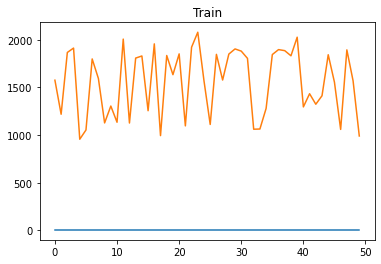

2/2 [==============================] - 8s 21ms/step


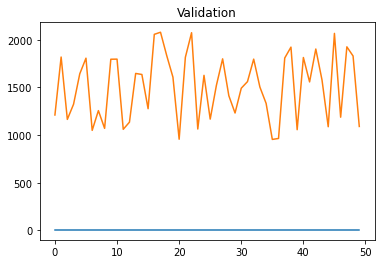

3/3 [==============================] - 0s 15ms/step


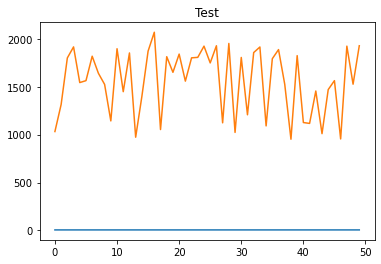

3/3 [==============================] - 0s 9ms/step


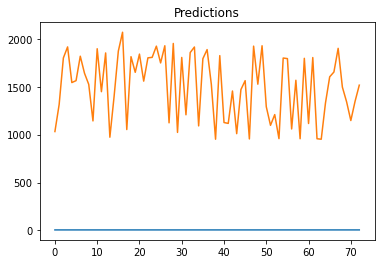

In [29]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [30]:
hybrid_cnn_lstm_mse

2353679.5600960865

### RNN LSTM

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 2525194.0000 - root_mean_squared_error: 1589.0859  

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 40s 4s/step - loss: 2458677.5000 - root_mean_squared_error: 1568.0171 - val_loss: 2389509.0000 - val_root_mean_squared_error: 1545.8037
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2457940.7500 - root_mean_squared_error: 1567.7821

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2457940.7500 - root_mean_squared_error: 1567.7821 - val_loss: 2388791.5000 - val_root_mean_squared_error: 1545.5715
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2466730.0000 - root_mean_squared_error: 1570.5826

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2457222.0000 - root_mean_squared_error: 1567.5529 - val_loss: 2388086.5000 - val_root_mean_squared_error: 1545.3435
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2456516.5000 - root_mean_squared_error: 1567.3279

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2456516.5000 - root_mean_squared_error: 1567.3279 - val_loss: 2387397.0000 - val_root_mean_squared_error: 1545.1204
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2469336.2500 - root_mean_squared_error: 1571.4122

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 2s/step - loss: 2455821.7500 - root_mean_squared_error: 1567.1062 - val_loss: 2386719.7500 - val_root_mean_squared_error: 1544.9012
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2490514.2500 - root_mean_squared_error: 1578.1364

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2455146.5000 - root_mean_squared_error: 1566.8907 - val_loss: 2386046.2500 - val_root_mean_squared_error: 1544.6832
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 2416544.7500 - root_mean_squared_error: 1554.5239

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2454458.0000 - root_mean_squared_error: 1566.6710 - val_loss: 2385369.0000 - val_root_mean_squared_error: 1544.4640
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2464504.7500 - root_mean_squared_error: 1569.8741

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2453770.2500 - root_mean_squared_error: 1566.4515 - val_loss: 2384672.0000 - val_root_mean_squared_error: 1544.2383
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 2428494.2500 - root_mean_squared_error: 1558.3627

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2453058.5000 - root_mean_squared_error: 1566.2242 - val_loss: 2383960.5000 - val_root_mean_squared_error: 1544.0079
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 2403835.5000 - root_mean_squared_error: 1550.4308

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2452334.0000 - root_mean_squared_error: 1565.9929 - val_loss: 2383226.5000 - val_root_mean_squared_error: 1543.7703
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2451585.0000 - root_mean_squared_error: 1565.7538

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2451585.0000 - root_mean_squared_error: 1565.7538 - val_loss: 2382467.0000 - val_root_mean_squared_error: 1543.5242
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2450808.7500 - root_mean_squared_error: 1565.5059

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2450808.7500 - root_mean_squared_error: 1565.5059 - val_loss: 2381695.0000 - val_root_mean_squared_error: 1543.2742
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2450023.0000 - root_mean_squared_error: 1565.2549

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2450023.0000 - root_mean_squared_error: 1565.2549 - val_loss: 2380911.7500 - val_root_mean_squared_error: 1543.0204
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2457415.7500 - root_mean_squared_error: 1567.6146

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2449230.2500 - root_mean_squared_error: 1565.0017 - val_loss: 2380124.2500 - val_root_mean_squared_error: 1542.7651
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2448433.2500 - root_mean_squared_error: 1564.7471

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2448433.2500 - root_mean_squared_error: 1564.7471 - val_loss: 2379344.0000 - val_root_mean_squared_error: 1542.5122
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2436778.2500 - root_mean_squared_error: 1561.0183

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2447654.0000 - root_mean_squared_error: 1564.4980 - val_loss: 2378585.0000 - val_root_mean_squared_error: 1542.2662
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2448371.2500 - root_mean_squared_error: 1564.7272

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2446896.2500 - root_mean_squared_error: 1564.2559 - val_loss: 2377847.2500 - val_root_mean_squared_error: 1542.0270
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2435413.7500 - root_mean_squared_error: 1560.5812

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2446163.7500 - root_mean_squared_error: 1564.0216 - val_loss: 2377139.2500 - val_root_mean_squared_error: 1541.7974
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 2450500.0000 - root_mean_squared_error: 1565.4073

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2445459.0000 - root_mean_squared_error: 1563.7964 - val_loss: 2376463.7500 - val_root_mean_squared_error: 1541.5784
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2444792.0000 - root_mean_squared_error: 1563.5830

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2444792.0000 - root_mean_squared_error: 1563.5830 - val_loss: 2375823.0000 - val_root_mean_squared_error: 1541.3705
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2444158.2500 - root_mean_squared_error: 1563.3804

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2444158.2500 - root_mean_squared_error: 1563.3804 - val_loss: 2375216.7500 - val_root_mean_squared_error: 1541.1738
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2443559.2500 - root_mean_squared_error: 1563.1888

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2443559.2500 - root_mean_squared_error: 1563.1888 - val_loss: 2374645.7500 - val_root_mean_squared_error: 1540.9885
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2442994.7500 - root_mean_squared_error: 1563.0082

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2442994.7500 - root_mean_squared_error: 1563.0082 - val_loss: 2374107.7500 - val_root_mean_squared_error: 1540.8140
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2442462.2500 - root_mean_squared_error: 1562.8379

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2442462.2500 - root_mean_squared_error: 1562.8379 - val_loss: 2373602.7500 - val_root_mean_squared_error: 1540.6501
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2397842.2500 - root_mean_squared_error: 1548.4968

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2441965.7500 - root_mean_squared_error: 1562.6791 - val_loss: 2373130.0000 - val_root_mean_squared_error: 1540.4967
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 2452387.7500 - root_mean_squared_error: 1566.0101

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2441502.2500 - root_mean_squared_error: 1562.5308 - val_loss: 2372688.5000 - val_root_mean_squared_error: 1540.3534
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2441067.0000 - root_mean_squared_error: 1562.3915

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2441067.0000 - root_mean_squared_error: 1562.3915 - val_loss: 2372272.5000 - val_root_mean_squared_error: 1540.2184
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2440658.0000 - root_mean_squared_error: 1562.2605

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2440658.0000 - root_mean_squared_error: 1562.2605 - val_loss: 2371886.2500 - val_root_mean_squared_error: 1540.0929
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2472472.2500 - root_mean_squared_error: 1572.4097

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2440279.7500 - root_mean_squared_error: 1562.1395 - val_loss: 2371522.7500 - val_root_mean_squared_error: 1539.9750
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2439921.2500 - root_mean_squared_error: 1562.0248

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2439921.2500 - root_mean_squared_error: 1562.0248 - val_loss: 2371183.7500 - val_root_mean_squared_error: 1539.8649
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 2451514.7500 - root_mean_squared_error: 1565.7313

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 11s 2s/step - loss: 2439583.7500 - root_mean_squared_error: 1561.9167 - val_loss: 2370862.2500 - val_root_mean_squared_error: 1539.7605
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2439265.0000 - root_mean_squared_error: 1561.8147

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2439265.0000 - root_mean_squared_error: 1561.8147 - val_loss: 2370555.0000 - val_root_mean_squared_error: 1539.6606
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 2561273.2500 - root_mean_squared_error: 1600.3978

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2438963.5000 - root_mean_squared_error: 1561.7181 - val_loss: 2370261.5000 - val_root_mean_squared_error: 1539.5653
Epoch 34/50
4/8 [==============>...............] - ETA: 0s - loss: 2463128.7500 - root_mean_squared_error: 1569.4358

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2438670.7500 - root_mean_squared_error: 1561.6244 - val_loss: 2369983.0000 - val_root_mean_squared_error: 1539.4749
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2473816.2500 - root_mean_squared_error: 1572.8370

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2438392.5000 - root_mean_squared_error: 1561.5353 - val_loss: 2369711.0000 - val_root_mean_squared_error: 1539.3866
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 2453629.2500 - root_mean_squared_error: 1566.4065

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2438119.5000 - root_mean_squared_error: 1561.4479 - val_loss: 2369442.5000 - val_root_mean_squared_error: 1539.2993
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2439048.7500 - root_mean_squared_error: 1561.7454

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2437847.5000 - root_mean_squared_error: 1561.3608 - val_loss: 2369175.5000 - val_root_mean_squared_error: 1539.2126
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2437579.0000 - root_mean_squared_error: 1561.2748

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2437579.0000 - root_mean_squared_error: 1561.2748 - val_loss: 2368906.0000 - val_root_mean_squared_error: 1539.1251
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2437303.7500 - root_mean_squared_error: 1561.1866

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2437303.7500 - root_mean_squared_error: 1561.1866 - val_loss: 2368633.5000 - val_root_mean_squared_error: 1539.0365
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 2432452.7500 - root_mean_squared_error: 1559.6322

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2437026.2500 - root_mean_squared_error: 1561.0978 - val_loss: 2368352.7500 - val_root_mean_squared_error: 1538.9453
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 2349785.5000 - root_mean_squared_error: 1532.9010

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2436737.5000 - root_mean_squared_error: 1561.0052 - val_loss: 2368063.5000 - val_root_mean_squared_error: 1538.8513
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2431034.7500 - root_mean_squared_error: 1559.1776

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2436442.7500 - root_mean_squared_error: 1560.9109 - val_loss: 2367761.0000 - val_root_mean_squared_error: 1538.7531
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2436134.0000 - root_mean_squared_error: 1560.8120

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2436134.0000 - root_mean_squared_error: 1560.8120 - val_loss: 2367452.2500 - val_root_mean_squared_error: 1538.6527
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2435821.2500 - root_mean_squared_error: 1560.7118

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2435821.2500 - root_mean_squared_error: 1560.7118 - val_loss: 2367141.0000 - val_root_mean_squared_error: 1538.5516
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2435505.7500 - root_mean_squared_error: 1560.6107

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2435505.7500 - root_mean_squared_error: 1560.6107 - val_loss: 2366837.7500 - val_root_mean_squared_error: 1538.4530
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 2466259.5000 - root_mean_squared_error: 1570.4329

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2435205.2500 - root_mean_squared_error: 1560.5144 - val_loss: 2366543.0000 - val_root_mean_squared_error: 1538.3573
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2428888.0000 - root_mean_squared_error: 1558.4890

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2434911.5000 - root_mean_squared_error: 1560.4203 - val_loss: 2366264.5000 - val_root_mean_squared_error: 1538.2667
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2450392.0000 - root_mean_squared_error: 1565.3728

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2434636.7500 - root_mean_squared_error: 1560.3323 - val_loss: 2366003.2500 - val_root_mean_squared_error: 1538.1818
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2434381.7500 - root_mean_squared_error: 1560.2505

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2434381.7500 - root_mean_squared_error: 1560.2505 - val_loss: 2365759.5000 - val_root_mean_squared_error: 1538.1025
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 2384395.2500 - root_mean_squared_error: 1544.1487

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 6s 9ms/step


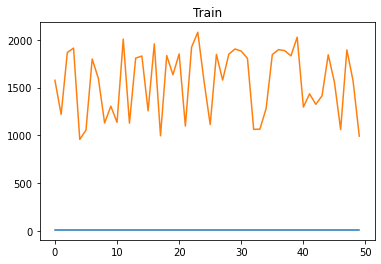

2/2 [==============================] - 2s 7ms/step


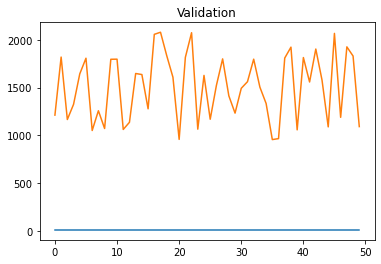

3/3 [==============================] - 0s 22ms/step


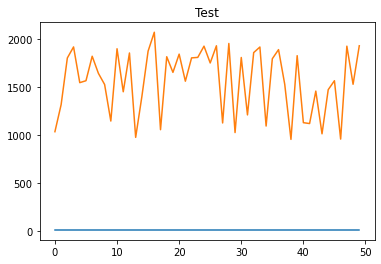

3/3 [==============================] - 0s 8ms/step


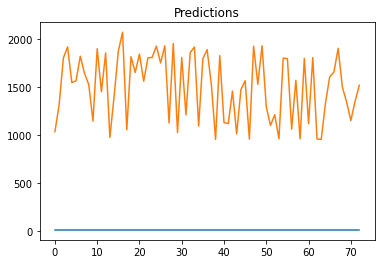

In [31]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [32]:
hybrid_rnn_lstm_mse

2344436.99069373

### RNN GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2462888.7500 - root_mean_squared_error: 1569.3594

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 38s 4s/step - loss: 2462888.7500 - root_mean_squared_error: 1569.3594 - val_loss: 2393688.0000 - val_root_mean_squared_error: 1547.1548
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2462168.7500 - root_mean_squared_error: 1569.1299

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2462168.7500 - root_mean_squared_error: 1569.1299 - val_loss: 2392972.2500 - val_root_mean_squared_error: 1546.9235
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2504146.5000 - root_mean_squared_error: 1582.4496

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2461443.0000 - root_mean_squared_error: 1568.8987 - val_loss: 2392256.7500 - val_root_mean_squared_error: 1546.6921
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2460721.0000 - root_mean_squared_error: 1568.6686

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2460721.0000 - root_mean_squared_error: 1568.6686 - val_loss: 2391538.7500 - val_root_mean_squared_error: 1546.4601
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2459996.5000 - root_mean_squared_error: 1568.4376

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2459996.5000 - root_mean_squared_error: 1568.4376 - val_loss: 2390817.0000 - val_root_mean_squared_error: 1546.2267
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2466390.0000 - root_mean_squared_error: 1570.4745

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2459260.0000 - root_mean_squared_error: 1568.2028 - val_loss: 2390098.5000 - val_root_mean_squared_error: 1545.9944
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2458538.7500 - root_mean_squared_error: 1567.9728

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2458538.7500 - root_mean_squared_error: 1567.9728 - val_loss: 2389383.2500 - val_root_mean_squared_error: 1545.7629
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 2455543.0000 - root_mean_squared_error: 1567.0172

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2457822.5000 - root_mean_squared_error: 1567.7444 - val_loss: 2388675.0000 - val_root_mean_squared_error: 1545.5339
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2457108.2500 - root_mean_squared_error: 1567.5166

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2457108.2500 - root_mean_squared_error: 1567.5166 - val_loss: 2387973.7500 - val_root_mean_squared_error: 1545.3070
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2456402.7500 - root_mean_squared_error: 1567.2915

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2456402.7500 - root_mean_squared_error: 1567.2915 - val_loss: 2387277.2500 - val_root_mean_squared_error: 1545.0817
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 2436579.5000 - root_mean_squared_error: 1560.9547

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2455702.2500 - root_mean_squared_error: 1567.0680 - val_loss: 2386600.0000 - val_root_mean_squared_error: 1544.8624
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2469876.7500 - root_mean_squared_error: 1571.5841

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2455023.5000 - root_mean_squared_error: 1566.8514 - val_loss: 2385926.5000 - val_root_mean_squared_error: 1544.6444
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2533992.7500 - root_mean_squared_error: 1591.8519

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2454348.7500 - root_mean_squared_error: 1566.6361 - val_loss: 2385270.2500 - val_root_mean_squared_error: 1544.4320
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 2536043.5000 - root_mean_squared_error: 1592.4960

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2453694.5000 - root_mean_squared_error: 1566.4272 - val_loss: 2384633.7500 - val_root_mean_squared_error: 1544.2260
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 2474641.7500 - root_mean_squared_error: 1573.0994

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2453054.5000 - root_mean_squared_error: 1566.2230 - val_loss: 2384015.5000 - val_root_mean_squared_error: 1544.0258
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2452435.0000 - root_mean_squared_error: 1566.0253

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2452435.0000 - root_mean_squared_error: 1566.0253 - val_loss: 2383411.2500 - val_root_mean_squared_error: 1543.8301
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2451830.2500 - root_mean_squared_error: 1565.8322

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2451830.2500 - root_mean_squared_error: 1565.8322 - val_loss: 2382827.0000 - val_root_mean_squared_error: 1543.6409
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2440980.7500 - root_mean_squared_error: 1562.3639

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2451251.5000 - root_mean_squared_error: 1565.6473 - val_loss: 2382262.5000 - val_root_mean_squared_error: 1543.4580
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2450691.2500 - root_mean_squared_error: 1565.4684

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2450691.2500 - root_mean_squared_error: 1565.4684 - val_loss: 2381717.5000 - val_root_mean_squared_error: 1543.2814
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2450147.5000 - root_mean_squared_error: 1565.2947

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2450147.5000 - root_mean_squared_error: 1565.2947 - val_loss: 2381195.7500 - val_root_mean_squared_error: 1543.1125
Epoch 21/50
4/8 [==============>...............] - ETA: 0s - loss: 2434426.2500 - root_mean_squared_error: 1560.2648

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2449628.7500 - root_mean_squared_error: 1565.1290 - val_loss: 2380691.2500 - val_root_mean_squared_error: 1542.9489
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2459663.7500 - root_mean_squared_error: 1568.3315

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2449124.0000 - root_mean_squared_error: 1564.9678 - val_loss: 2380205.7500 - val_root_mean_squared_error: 1542.7915
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2473490.2500 - root_mean_squared_error: 1572.7334

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2448640.2500 - root_mean_squared_error: 1564.8131 - val_loss: 2379734.0000 - val_root_mean_squared_error: 1542.6387
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2448169.2500 - root_mean_squared_error: 1564.6627

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2448169.2500 - root_mean_squared_error: 1564.6627 - val_loss: 2379275.5000 - val_root_mean_squared_error: 1542.4900
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 2486408.5000 - root_mean_squared_error: 1576.8350

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2447713.7500 - root_mean_squared_error: 1564.5171 - val_loss: 2378834.5000 - val_root_mean_squared_error: 1542.3470
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2447273.5000 - root_mean_squared_error: 1564.3763

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2447273.5000 - root_mean_squared_error: 1564.3763 - val_loss: 2378412.7500 - val_root_mean_squared_error: 1542.2103
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2521309.7500 - root_mean_squared_error: 1587.8633

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2446855.2500 - root_mean_squared_error: 1564.2427 - val_loss: 2378003.0000 - val_root_mean_squared_error: 1542.0775
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2469378.2500 - root_mean_squared_error: 1571.4255

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2446447.0000 - root_mean_squared_error: 1564.1122 - val_loss: 2377615.5000 - val_root_mean_squared_error: 1541.9519
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 2407896.5000 - root_mean_squared_error: 1551.7399

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2446064.0000 - root_mean_squared_error: 1563.9897 - val_loss: 2377249.7500 - val_root_mean_squared_error: 1541.8333
Epoch 30/50
4/8 [==============>...............] - ETA: 0s - loss: 2422420.0000 - root_mean_squared_error: 1556.4126

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2445700.5000 - root_mean_squared_error: 1563.8735 - val_loss: 2376901.0000 - val_root_mean_squared_error: 1541.7201
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2445353.7500 - root_mean_squared_error: 1563.7627

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2445353.7500 - root_mean_squared_error: 1563.7627 - val_loss: 2376567.0000 - val_root_mean_squared_error: 1541.6118
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 2507701.5000 - root_mean_squared_error: 1583.5724

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2445023.7500 - root_mean_squared_error: 1563.6572 - val_loss: 2376246.5000 - val_root_mean_squared_error: 1541.5078
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2444707.5000 - root_mean_squared_error: 1563.5560

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2444707.5000 - root_mean_squared_error: 1563.5560 - val_loss: 2375943.2500 - val_root_mean_squared_error: 1541.4095
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 2491260.0000 - root_mean_squared_error: 1578.3726

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2444406.2500 - root_mean_squared_error: 1563.4597 - val_loss: 2375650.7500 - val_root_mean_squared_error: 1541.3146
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2444115.7500 - root_mean_squared_error: 1563.3668

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2444115.7500 - root_mean_squared_error: 1563.3668 - val_loss: 2375371.2500 - val_root_mean_squared_error: 1541.2240
Epoch 36/50
5/8 [=================>............] - ETA: 0s - loss: 2462700.0000 - root_mean_squared_error: 1569.2992

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2443836.5000 - root_mean_squared_error: 1563.2775 - val_loss: 2375099.2500 - val_root_mean_squared_error: 1541.1357
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 2433907.0000 - root_mean_squared_error: 1560.0984

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2443563.7500 - root_mean_squared_error: 1563.1903 - val_loss: 2374836.2500 - val_root_mean_squared_error: 1541.0504
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2432499.2500 - root_mean_squared_error: 1559.6471

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2443300.7500 - root_mean_squared_error: 1563.1061 - val_loss: 2374580.7500 - val_root_mean_squared_error: 1540.9675
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2443047.0000 - root_mean_squared_error: 1563.0249

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2443047.0000 - root_mean_squared_error: 1563.0249 - val_loss: 2374333.7500 - val_root_mean_squared_error: 1540.8873
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2459520.2500 - root_mean_squared_error: 1568.2858

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2442798.5000 - root_mean_squared_error: 1562.9454 - val_loss: 2374092.7500 - val_root_mean_squared_error: 1540.8091
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2442559.0000 - root_mean_squared_error: 1562.8689

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2442559.0000 - root_mean_squared_error: 1562.8689 - val_loss: 2373860.5000 - val_root_mean_squared_error: 1540.7338
Epoch 42/50
4/8 [==============>...............] - ETA: 0s - loss: 2435579.5000 - root_mean_squared_error: 1560.6343

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2442326.7500 - root_mean_squared_error: 1562.7946 - val_loss: 2373634.7500 - val_root_mean_squared_error: 1540.6605
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2442101.2500 - root_mean_squared_error: 1562.7224

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2442101.2500 - root_mean_squared_error: 1562.7224 - val_loss: 2373416.0000 - val_root_mean_squared_error: 1540.5895
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2468800.2500 - root_mean_squared_error: 1571.2416

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2441883.5000 - root_mean_squared_error: 1562.6527 - val_loss: 2373201.0000 - val_root_mean_squared_error: 1540.5198
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 2367269.7500 - root_mean_squared_error: 1538.5934

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2441666.5000 - root_mean_squared_error: 1562.5833 - val_loss: 2372994.5000 - val_root_mean_squared_error: 1540.4526
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 2492568.7500 - root_mean_squared_error: 1578.7871

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2441461.5000 - root_mean_squared_error: 1562.5177 - val_loss: 2372790.5000 - val_root_mean_squared_error: 1540.3865
Epoch 47/50
4/8 [==============>...............] - ETA: 0s - loss: 2475310.0000 - root_mean_squared_error: 1573.3118

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2441257.5000 - root_mean_squared_error: 1562.4524 - val_loss: 2372592.0000 - val_root_mean_squared_error: 1540.3220
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 2434724.7500 - root_mean_squared_error: 1560.3605

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2441059.2500 - root_mean_squared_error: 1562.3889 - val_loss: 2372399.7500 - val_root_mean_squared_error: 1540.2596
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 2412731.5000 - root_mean_squared_error: 1553.2970

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2440866.7500 - root_mean_squared_error: 1562.3274 - val_loss: 2372214.0000 - val_root_mean_squared_error: 1540.1993
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 2432503.7500 - root_mean_squared_error: 1559.6486

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 8ms/step


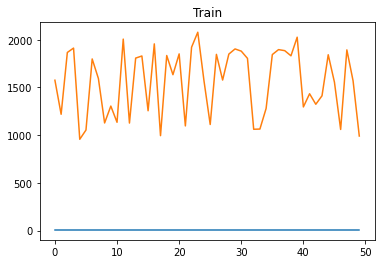

2/2 [==============================] - 2s 8ms/step


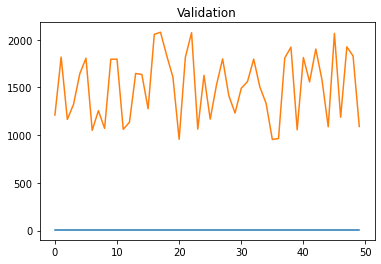

3/3 [==============================] - 0s 55ms/step


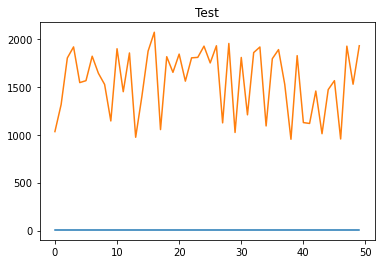

3/3 [==============================] - 0s 7ms/step


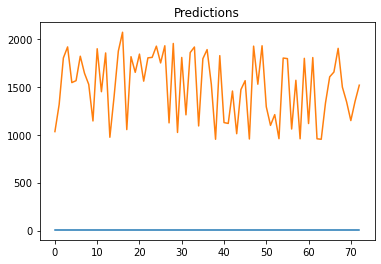

In [33]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
hybrid_rnn_gru_mse

2350896.538286063

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2481982.7500 - root_mean_squared_error: 1575.4310

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 68s 6s/step - loss: 2460921.0000 - root_mean_squared_error: 1568.7323 - val_loss: 2391804.5000 - val_root_mean_squared_error: 1546.5460
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2450033.7500 - root_mean_squared_error: 1565.2584

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2460325.5000 - root_mean_squared_error: 1568.5425 - val_loss: 2391256.2500 - val_root_mean_squared_error: 1546.3687
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2479894.7500 - root_mean_squared_error: 1574.7682

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2459764.2500 - root_mean_squared_error: 1568.3635 - val_loss: 2390739.5000 - val_root_mean_squared_error: 1546.2017
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2459217.7500 - root_mean_squared_error: 1568.1893

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2459217.7500 - root_mean_squared_error: 1568.1893 - val_loss: 2390220.7500 - val_root_mean_squared_error: 1546.0339
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2458609.2500 - root_mean_squared_error: 1567.9952

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2458609.2500 - root_mean_squared_error: 1567.9952 - val_loss: 2389263.5000 - val_root_mean_squared_error: 1545.7242
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2442004.2500 - root_mean_squared_error: 1562.6914

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2457510.0000 - root_mean_squared_error: 1567.6448 - val_loss: 2388260.5000 - val_root_mean_squared_error: 1545.3998
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2469363.7500 - root_mean_squared_error: 1571.4209

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2456697.7500 - root_mean_squared_error: 1567.3856 - val_loss: 2387618.5000 - val_root_mean_squared_error: 1545.1920
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2448855.5000 - root_mean_squared_error: 1564.8820

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2456102.2500 - root_mean_squared_error: 1567.1957 - val_loss: 2387091.5000 - val_root_mean_squared_error: 1545.0215
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2469034.7500 - root_mean_squared_error: 1571.3163

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2455437.2500 - root_mean_squared_error: 1566.9835 - val_loss: 2385996.2500 - val_root_mean_squared_error: 1544.6670
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2463036.2500 - root_mean_squared_error: 1569.4064

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2454451.5000 - root_mean_squared_error: 1566.6689 - val_loss: 2385452.2500 - val_root_mean_squared_error: 1544.4910
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2453922.7500 - root_mean_squared_error: 1566.5001

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2453922.7500 - root_mean_squared_error: 1566.5001 - val_loss: 2384970.0000 - val_root_mean_squared_error: 1544.3348
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2453444.2500 - root_mean_squared_error: 1566.3474

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2453444.2500 - root_mean_squared_error: 1566.3474 - val_loss: 2384492.7500 - val_root_mean_squared_error: 1544.1803
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2467269.5000 - root_mean_squared_error: 1570.7544

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2452967.5000 - root_mean_squared_error: 1566.1952 - val_loss: 2384024.7500 - val_root_mean_squared_error: 1544.0287
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2441852.5000 - root_mean_squared_error: 1562.6428

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2452496.2500 - root_mean_squared_error: 1566.0448 - val_loss: 2383568.0000 - val_root_mean_squared_error: 1543.8809
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2453199.5000 - root_mean_squared_error: 1566.2693

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2452037.0000 - root_mean_squared_error: 1565.8982 - val_loss: 2383112.2500 - val_root_mean_squared_error: 1543.7333
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2451584.0000 - root_mean_squared_error: 1565.7535

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2451584.0000 - root_mean_squared_error: 1565.7535 - val_loss: 2382661.5000 - val_root_mean_squared_error: 1543.5872
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2422344.7500 - root_mean_squared_error: 1556.3884

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2451135.5000 - root_mean_squared_error: 1565.6102 - val_loss: 2382222.2500 - val_root_mean_squared_error: 1543.4449
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2450692.5000 - root_mean_squared_error: 1565.4688

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 2450692.5000 - root_mean_squared_error: 1565.4688 - val_loss: 2381784.7500 - val_root_mean_squared_error: 1543.3032
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2450256.2500 - root_mean_squared_error: 1565.3295

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 2450256.2500 - root_mean_squared_error: 1565.3295 - val_loss: 2381357.0000 - val_root_mean_squared_error: 1543.1646
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2449825.5000 - root_mean_squared_error: 1565.1919

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 2449825.5000 - root_mean_squared_error: 1565.1919 - val_loss: 2380935.0000 - val_root_mean_squared_error: 1543.0278
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2449400.7500 - root_mean_squared_error: 1565.0562

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2449400.7500 - root_mean_squared_error: 1565.0562 - val_loss: 2380518.5000 - val_root_mean_squared_error: 1542.8929
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2448985.5000 - root_mean_squared_error: 1564.9235

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 2448985.5000 - root_mean_squared_error: 1564.9235 - val_loss: 2380116.2500 - val_root_mean_squared_error: 1542.7623
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2448583.0000 - root_mean_squared_error: 1564.7949

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 2448583.0000 - root_mean_squared_error: 1564.7949 - val_loss: 2379725.7500 - val_root_mean_squared_error: 1542.6361
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2448195.0000 - root_mean_squared_error: 1564.6709

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2448195.0000 - root_mean_squared_error: 1564.6709 - val_loss: 2379344.5000 - val_root_mean_squared_error: 1542.5125
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2447815.0000 - root_mean_squared_error: 1564.5494

In [ ]:
hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_rnn_gru_mse

### LSTM RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_rnn_gru_mse

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [ ]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]
msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [ ]:
msedf

In [ ]:
msedf.to_csv("msedfECA.csv", index= False)

In [ ]:
msedf.plot("Model", "RMSE", kind= "bar")